In [1]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
# load pytraj
import pytraj as pt
import plotly.express as px
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import davies_bouldin_score
import scipy.stats as stats
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import davies_bouldin_score
import scipy.stats as stats
import plotly.express as px
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from umap import UMAP
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)

Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)/home/gayatrip/miniconda3/envs/gmxMMPBSA/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Domain assignmenmt as per 5F9R
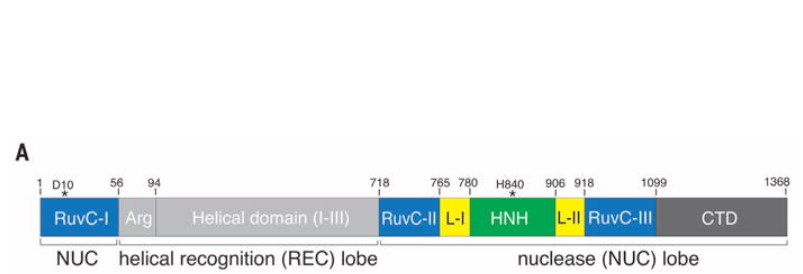
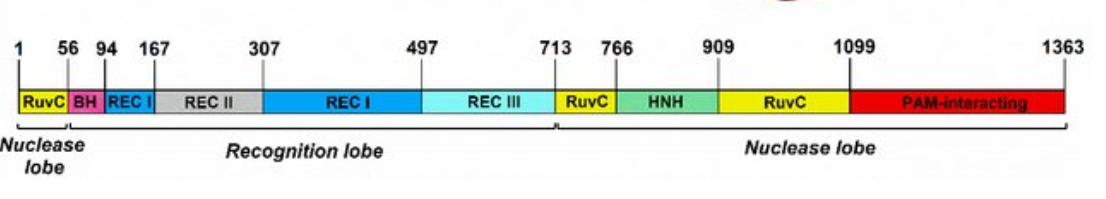

In this study , the Protein starts from residue 2-1364 (protein), 1365-1479 (sgRNA), 1480-1509 (tDNA), 1510-1528 (ntDNA)
- RuvC- :1-56,718-765,918-1099
- HNH - :780-906
- Rec1 - :94-167,308-497
- Rec2 - :168-307
- Rec3 - :498-713
- sgRNA(20bp) :1365-1384
- tDNA (20bp) :1490-1508
- ntDNA-tDNA :1518-1528,1480-1489

In [2]:
# load trajectory to memory
root_dir='/storage3/gayatrip'
sp_traj=pt.load('/storage3/gayatrip/EMX1-Sp_native_rep/5f9r_emx1_duplex_nowat_rep_0-500ns.nc','/storage3/gayatrip/EMX1-Sp_native_rep/5f9r_emx1_duplex_rep_dry.prmtop')
spmm20_traj = pt.load('/storage3/gayatrip/EMX1-Sp_mm20_rep/5f9r_emx1_mm20_nowat_combined_part1_500ns.nc', '/storage3/gayatrip/EMX1-Sp_mm20_rep/5f9r_emx1_duplex_rep_mm20_dry.prmtop') # 500ps, 15000 frames
spmm17_20_traj = pt.load('/storage3/gayatrip/EMX1-Sp_mm17-20_rep/5f9r_emx1_mm17-20_nowat_combined_part1_500ns.nc', '/storage3/gayatrip/EMX1-Sp_mm17-20_rep/5f9r_emx1_duplex_rep_mm17-20dry.prmtop') # 500ps, 15000 frames
spmm16_19_traj= pt.load('/storage3/gayatrip/EMX1-Sp_mm16_19_rep/5f9r_emx1_nat_nowat_combined_part1_500ns.nc', '/storage3/gayatrip/EMX1-Sp_mm16_19_rep/5f9r_emx1_duplex_rep_mm16_19_dry.prmtop')

In [6]:
sp_rmsd= list(pt.rmsd(sp_traj, ref=0, mask='@C,CA,N,O'))
spmm20_rmsd= list(pt.rmsd(spmm20_traj, ref=0, mask='@C,CA,N,O'))
spmm16_19_rmsd= list(pt.rmsd(spmm16_19_traj, ref=0, mask='@C,CA,N,O'))
spmm17_20_rmsd= list(pt.rmsd(spmm17_20_traj , ref=0, mask='@C,CA,N,O'))

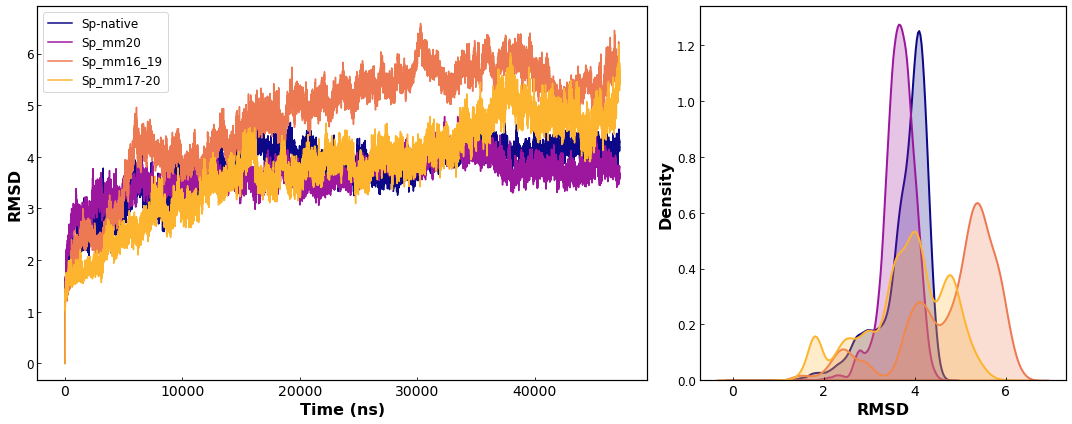

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace with your own data)
data_rmsd_sp = pd.DataFrame(list(zip(sp_rmsd, spmm20_rmsd, spmm16_19_rmsd, spmm17_20_rmsd)),
                            columns=['RMSD_sp_native', 'RMSD_sp_mm20', 'RMSD_sp_mm16_19', 'RMSD_sp_mm17-20'])

# Create the main plot using gridspec
color_dict = ['#0d0887', '#9c179e', '#ed7953', '#fdb42f']
fig = plt.figure(figsize=(15, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[2.5, 1.5])

# Create the RMSD plot
ax1 = fig.add_subplot(gs[0])
data_rmsd_sp.plot(ax=ax1, color=color_dict)
plt.legend(['Sp-native', 'Sp_mm20', 'Sp_mm16_19', 'Sp_mm17-20'], fontsize=12)
plt.ylabel('RMSD', fontsize=16, fontweight='bold')
plt.xlabel('Time (ns)',fontsize=16, fontweight='bold')
ax1.spines['left'].set_linewidth(1.2)
ax1.spines['bottom'].set_linewidth(1.2)
ax1.spines['top'].set_linewidth(1.2)
ax1.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')

# Create the density plot on the right
ax2 = fig.add_subplot(gs[1])
sns.kdeplot(data=data_rmsd_sp['RMSD_sp_native'], ax=ax2, color=color_dict[0], label='Sp-native', fill=True,linewidth=2)
sns.kdeplot(data=data_rmsd_sp['RMSD_sp_mm20'], ax=ax2, color=color_dict[1], label='Sp_mm20', fill=True, linewidth=2)
sns.kdeplot(data=data_rmsd_sp['RMSD_sp_mm16_19'], ax=ax2, color=color_dict[2], label='Sp_mm16_19', fill=True, linewidth=2)
sns.kdeplot(data=data_rmsd_sp['RMSD_sp_mm17-20'], ax=ax2, color=color_dict[3], label='Sp_mm17-20', fill=True, linewidth=2)
plt.xlabel('RMSD', fontsize=16, fontweight='bold')
plt.ylabel('Density', fontsize=16, fontweight='bold')
#plt.legend(fontsize=12)
ax2.spines['left'].set_linewidth(1.2)
ax2.spines['bottom'].set_linewidth(1.2)
ax2.spines['top'].set_linewidth(1.2)
ax2.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.tight_layout()

plt.savefig('figures/SpCas9_all_RMSD_with_density_subplot.svg')
plt.show()


In [8]:
data_rmsd_sp_save=data_rmsd_sp.stack().reset_index().sort_values(by=['level_1'], ascending=False).iloc[:,1:]
data_rmsd_sp_save.columns=['Label','RMSD']
data_rmsd_sp_save.to_csv('nodt_csvs/SpCas9-FnCas9_all-hybrid_RMSD_nodt.csv', index=False)
data_rmsd_sp_save.head()

,Label,RMSD
0,RMSD_sp_native,0.000000
88120,RMSD_sp_native,3.689392
88184,RMSD_sp_native,3.752033
88180,RMSD_sp_native,3.623863
88176,RMSD_sp_native,3.627857


In [4]:
# Analysis for stable part of trajectory 300-500ns, 1000frames
traj1=sp_traj[30000:50000:20]
traj2=spmm20_traj[30000:50000:20]
traj3=spmm16_19_traj[30000:50000:20]
traj4=spmm17_20_traj [30000:50000:20]

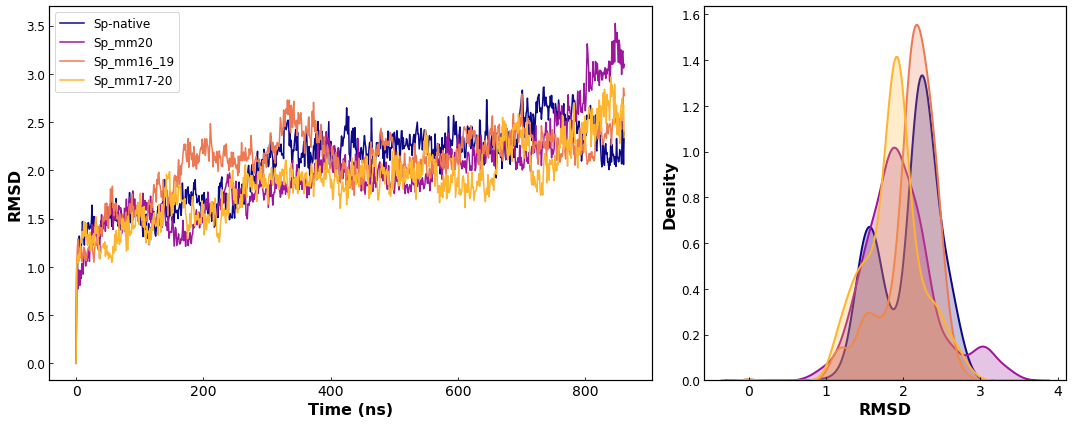

In [32]:
from matplotlib import pyplot as plt
import pandas as pd
sp_dup_rmsd=list(pt.rmsd(traj1, ref=0, mask=':1365-1384,1490-1508'))
spmm20_dup_rmsd=list(pt.rmsd(traj2, ref=0, mask=':1365-1384,1490-1508'))
spmm16_19_dup_rmsd=list(pt.rmsd(traj4, ref=0, mask=':1365-1384,1490-1508'))
spmm17_20_dup_rmsd=list(pt.rmsd(traj3, ref=0, mask=':1365-1384,1490-1508'))
dup_rmsd=pd.DataFrame(list(zip(sp_dup_rmsd,spmm20_dup_rmsd,spmm16_19_dup_rmsd,spmm17_20_dup_rmsd)), columns=['Sp_native','Sp_mm20','Sp_mm16_19','Sp_mm17-20'])

# color_dict=['#0d0887','#9c179e','#ed7953','#fdb42f']

# dup_rmsd.plot(color=color_dict)
# plt.legend(['SpCas9-native','SpCas9-mm20','SpCas9-mm16_19','Spcas9_mm17-20'],fontsize=14)
# plt.ylabel('RMSD (Angstrom)',fontsize=16, fontweight='bold')
# plt.xlabel('Time(ns)', fontsize=16, fontweight='bold')
# #plt.title('Backbone after lsq fit to Backbone')
# plt.gcf().set_size_inches(8, 5)

# Create the main plot using gridspec
color_dict = ['#0d0887', '#9c179e', '#ed7953', '#fdb42f']
fig = plt.figure(figsize=(15, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[2.5, 1.5])

# Create the RMSD plot
ax1 = fig.add_subplot(gs[0])
dup_rmsd.plot(ax=ax1, color=color_dict)
plt.legend(['Sp-native', 'Sp_mm20', 'Sp_mm16_19', 'Sp_mm17-20'], fontsize=12)
plt.ylabel('RMSD', fontsize=16, fontweight='bold')
plt.xlabel('Time (ns)',fontsize=16, fontweight='bold')
ax1.spines['left'].set_linewidth(1.2)
ax1.spines['bottom'].set_linewidth(1.2)
ax1.spines['top'].set_linewidth(1.2)
ax1.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')

# Create the density plot on the right
ax2 = fig.add_subplot(gs[1])
sns.kdeplot(data=dup_rmsd['Sp_native'], ax=ax2, color=color_dict[0], label='Sp-native', fill=True,linewidth=2)
sns.kdeplot(data=dup_rmsd['Sp_mm20'], ax=ax2, color=color_dict[1], label='Sp_mm20', fill=True, linewidth=2)
sns.kdeplot(data=dup_rmsd['Sp_mm16_19'], ax=ax2, color=color_dict[2], label='Sp_mm16_19', fill=True, linewidth=2)
sns.kdeplot(data=dup_rmsd['Sp_mm17-20'], ax=ax2, color=color_dict[3], label='Sp_mm17-20', fill=True, linewidth=2)
plt.xlabel('RMSD', fontsize=16, fontweight='bold')
plt.ylabel('Density', fontsize=16, fontweight='bold')
#plt.legend(fontsize=12)
ax2.spines['left'].set_linewidth(1.2)
ax2.spines['bottom'].set_linewidth(1.2)
ax2.spines['top'].set_linewidth(1.2)
ax2.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.tight_layout()
plt.savefig('figures/SpCas9_all_RMSD-duplex_with_density-stable-part_subplot.svg')
plt.show()

In [ ]:
dup_rmsd_save=dup_rmsd.stack().reset_index().sort_values(by=['level_1'], ascending=False).iloc[:,1:]
dup_rmsd_save.columns=['Label','RMSD']
dup_rmsd_save.to_csv('SpCas9-FnCas9_all-hybrid_RMSD.csv', index=False)
dup_rmsd_save.head()

In [1]:
# # calculate rmsd with reference as 0-th frame, backbone heavy atoms for no-dt trajectory
sp_rmsd_first= list(pt.rmsd(sp_traj, ref=0, mask='@C,CA,N,O'))
sp_dup_rmsd=list(pt.rmsd(sp_traj, ref=0, mask=':1365-1384,1490-1508'))
sp_rg = list(pt.radgyr(sp_traj, mask='@CA'))
#sp_rmsf=list(pt.rmsf(sp_traj,'@CA'))
sp_sec=list(pt.dssp(sp_traj, ":2-1364"))
sp_surf=list(pt.molsurf(sp_traj, '@C,CA,N,O'))
sp_prot = list(pt.search_hbonds(sp_traj, ':2-1364'))
res_sp, ss_sp, _ = list(pt.dssp(sp_traj, simplified=True))
#print(data_rmsd_first)

spmm20_rmsd_first= list(pt.rmsd(spmm20_traj, ref=0, mask='@C,CA,N,O'))
spmm20_rg = list(pt.radgyr(spmm20_traj, mask='@CA'))
#spmm20_rmsf=list(pt.rmsf(spmm20_traj,'@CA'))
spmm20_sec=list(pt.dssp(spmm20_traj, ":2-1364"))
spmm20_surf=list(pt.molsurf(spmm20_traj, '@C,CA,N,O'))
spmm20_prot = list(pt.search_hbonds(spmm20_traj, ':2-1364'))
res_spmm20, ss_spmm20, _ = list(pt.dssp(spmm20_traj, simplified=True))

spmm17_20_rmsd_first= list(pt.rmsd(spmm16_19_traj, ref=0, mask='@C,CA,N,O'))
spmm17_20_rg = list(pt.radgyr(spmm16_19_traj, mask='@CA'))
#spmm20_rmsf=list(pt.rmsf(spmm20_traj,'@CA'))
spmm17_20_sec=list(pt.dssp(spmm16_19_traj, ":2-1364"))
spmm17_20_surf=list(pt.molsurf(spmm16_19_traj, '@C,CA,N,O'))
spmm17_20_prot = list(pt.search_hbonds(spmm16_19_traj, ':2-1364'))
res_spmm17_20, ss_spmm17_20, _ = list(pt.dssp(spmm16_19_traj, simplified=True))

spmm16_19_rmsd_first= list(pt.rmsd(spmm17_20_traj, ref=0, mask='@C,CA,N,O'))
spmm16_19_rg = list(pt.radgyr(spmm17_20_traj, mask='@CA'))
#spmm20_rmsf=list(pt.rmsf(spmm20_traj,'@CA'))
spmm16_19_sec=list(pt.dssp(spmm17_20_traj, ":2-1364"))
spmm16_19_surf=list(pt.molsurf(spmm17_20_traj, '@C,CA,N,O'))
spmm16_19_prot = list(pt.search_hbonds(spmm17_20_traj, ':2-1364'))
res_spmm16_19, ss_spmm16_19, _ = list(pt.dssp(spmm17_20_traj, simplified=True))

In [35]:
data_rmsd_first=pd.DataFrame(list(zip(sp_rmsd_first,spmm20_rmsd_first,spmm16_19_rmsd_first,spmm17_20_rmsd_first)), columns=['RMSD_sp_native','RMSD_sp_mm20','RMSD_sp_mm16-19','RMSD_sp_mm17-20'])
data_rg = pd.DataFrame(list(zip(sp_rg,spmm20_rg,spmm16_19_rg,spmm17_20_rg)), columns=['ROG_sp_native','ROG_sp_mm20','ROG_sp_mm16-19','ROG_sp_mm17-20'])
#data_rmsf=pd.DataFrame(list(zip(sp_rmsf.T,spmm20_rmsf.T)), columns=['RMSF_sp_native','RMSF_sp_mm20'])
data_sec=pd.DataFrame(list(zip(sp_sec,spmm20_sec,spmm16_19_sec,spmm17_20_sec)), columns=['Sec_sp_native','Sec_sp_mm20','Sec_sp_mm16-19','Sec_sp_mm17-20'])
data_surf=pd.DataFrame(list(zip(sp_surf,spmm20_surf,spmm16_19_surf,spmm17_20_surf)), columns=['SASA_sp_native','SASA_sp_mm20','SASA_sp_mm16-19','SASA_sp_mm17-20'])
data_prot = pd.DataFrame(list(zip(sp_prot,spmm20_prot,spmm16_19_prot,spmm17_20_prot)), columns=['Hbonds_sp_native','Hbonds_sp_mm20','Hbonds_sp_mm16-19','Hbonds_sp_mm17-20'])
data_prot.head()

,Hbonds_sp_native,Hbonds_sp_mm20,Hbonds_sp_mm16-19,Hbonds_sp_mm17-20
0,"[653, 657, 666, 661, 640, 655, 676, 672, 665, ...","[705, 657, 677, 672, 662, 649, 639, 674, 667, ...","[645, 666, 676, 642, 668, 669, 664, 623, 630, ...","[697, 642, 664, 639, 652, 679, 644, 647, 646, ..."
1,"[1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, ...","[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,"[1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, ..."
3,"[1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, ...","[1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, ...","[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, ...","[1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, ..."
4,"[1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, ...","[1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, ...","[1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [33]:
# # calculate rmsd with reference as 0-th frame, backbone heavy atoms
sp_rmsd_first= list(pt.rmsd(traj1, ref=0, mask='@C,CA,N,O'))
sp_dup_rmsd=list(pt.rmsd(traj1, ref=0, mask=':1365-1384,1490-1508'))
sp_rg = list(pt.radgyr(traj1, mask='@CA'))
#sp_rmsf=list(pt.rmsf(traj1,'@CA'))
sp_sec=list(pt.dssp(traj1, ":2-1364"))
sp_surf=list(pt.molsurf(traj1, '@C,CA,N,O'))
sp_prot = list(pt.search_hbonds(traj1, ':2-1364'))
res_sp, ss_sp, _ = list(pt.dssp(traj1, simplified=True))
#print(data_rmsd_first)

spmm20_rmsd_first= list(pt.rmsd(traj2, ref=0, mask='@C,CA,N,O'))
spmm20_rg = list(pt.radgyr(traj2, mask='@CA'))
#spmm20_rmsf=list(pt.rmsf(traj2,'@CA'))
spmm20_sec=list(pt.dssp(traj2, ":2-1364"))
spmm20_surf=list(pt.molsurf(traj2, '@C,CA,N,O'))
spmm20_prot = list(pt.search_hbonds(traj2, ':2-1364'))
res_spmm20, ss_spmm20, _ = list(pt.dssp(traj2, simplified=True))

spmm17_20_rmsd_first= list(pt.rmsd(traj3, ref=0, mask='@C,CA,N,O'))
spmm17_20_rg = list(pt.radgyr(traj3, mask='@CA'))
#spmm20_rmsf=list(pt.rmsf(traj2,'@CA'))
spmm17_20_sec=list(pt.dssp(traj3, ":2-1364"))
spmm17_20_surf=list(pt.molsurf(traj3, '@C,CA,N,O'))
spmm17_20_prot = list(pt.search_hbonds(traj3, ':2-1364'))
res_spmm17_20, ss_spmm17_20, _ = list(pt.dssp(traj3, simplified=True))

spmm16_19_rmsd_first= list(pt.rmsd(traj4, ref=0, mask='@C,CA,N,O'))
spmm16_19_rg = list(pt.radgyr(traj4, mask='@CA'))
#spmm20_rmsf=list(pt.rmsf(traj2,'@CA'))
spmm16_19_sec=list(pt.dssp(traj4, ":2-1364"))
spmm16_19_surf=list(pt.molsurf(traj4, '@C,CA,N,O'))
spmm16_19_prot = list(pt.search_hbonds(traj4, ':2-1364'))
res_spmm16_19, ss_spmm16_19, _ = list(pt.dssp(traj4, simplified=True))

In [ ]:
spmm16_19_rmsd_first= list(pt.rmsd(traj4, ref=0, mask='@C,CA,N,O'))

In [36]:
import pandas as pd # 
data_rmsd_first=pd.DataFrame(list(zip(sp_rmsd_first,spmm20_rmsd_first,spmm16_19_rmsd_first,spmm17_20_rmsd_first)), columns=['RMSD_sp_native','RMSD_sp_mm20','RMSD_sp_mm16-19','RMSD_sp_mm17-20'])
data_rg = pd.DataFrame(list(zip(sp_rg,spmm20_rg,spmm16_19_rg,spmm17_20_rg)), columns=['ROG_sp_native','ROG_sp_mm20','ROG_sp_mm16-19','ROG_sp_mm17-20'])
data_sec=pd.DataFrame(list(zip(sp_sec,spmm20_sec,spmm16_19_sec,spmm17_20_sec)), columns=['Sec_sp_native','Sec_sp_mm20','Sec_sp_mm16-19','Sec_sp_mm17-20'])
data_surf=pd.DataFrame(list(zip(sp_surf,spmm20_surf,spmm16_19_surf,spmm17_20_surf)), columns=['SASA_sp_native','SASA_sp_mm20','SASA_sp_mm16-19','SASA_sp_mm17-20'])
data_prot = pd.DataFrame(list(zip(sp_prot,spmm20_prot,spmm16_19_prot,spmm17_20_prot)), columns=['Hbonds_sp_native','Hbonds_sp_mm20','Hbonds_sp_mm16-19','Hbonds_sp_mm17-20'])
data_prot.head()

,Hbonds_sp_native,Hbonds_sp_mm20,Hbonds_sp_mm16-19,Hbonds_sp_mm17-20
0,"[653, 657, 666, 661, 640, 655, 676, 672, 665, ...","[705, 657, 677, 672, 662, 649, 639, 674, 667, ...","[645, 666, 676, 642, 668, 669, 664, 623, 630, ...","[697, 642, 664, 639, 652, 679, 644, 647, 646, ..."
1,"[1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, ...","[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,"[1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, ..."
3,"[1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, ...","[1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, ...","[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, ...","[1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, ..."
4,"[1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, ...","[1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, ...","[1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [41]:
data_surf.head()

,SASA_sp_native,SASA_sp_mm20,SASA_sp_mm16-19,SASA_sp_mm17-20
0,55513.435342,55744.431557,55698.099576,55830.841508
1,55501.577950,55903.763613,55726.500755,55848.463575
2,55643.355673,55658.296488,55556.849274,56020.060485
3,55621.616364,55592.834864,55663.585907,55996.980584
4,55692.892264,55721.611340,55584.882823,55918.005073


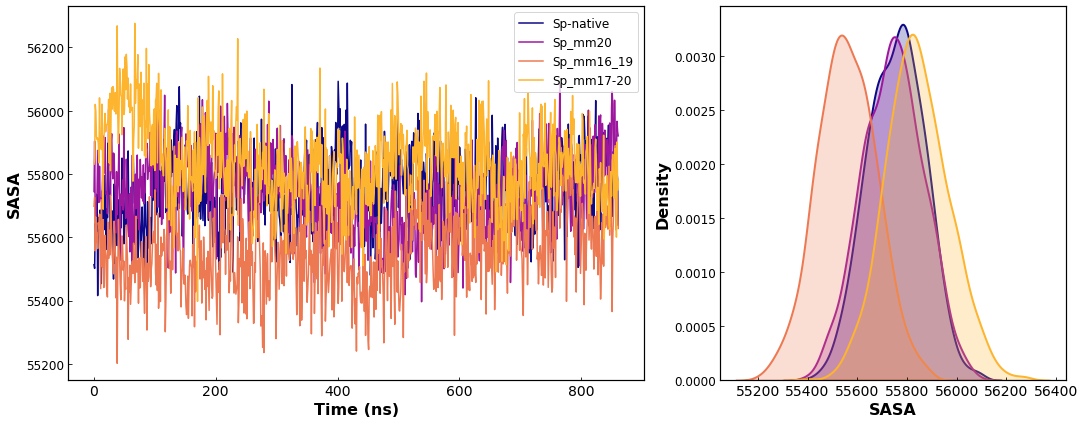

In [51]:
from matplotlib import pyplot as plt
color_dict = ['#0d0887', '#9c179e', '#ed7953', '#fdb42f']
fig = plt.figure(figsize=(15, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[2.5, 1.5])

# Create the RMSD plot
ax1 = fig.add_subplot(gs[0])
data_surf.plot(ax=ax1, color=color_dict)
plt.legend(['Sp-native', 'Sp_mm20', 'Sp_mm16_19', 'Sp_mm17-20'], fontsize=12)
plt.ylabel('SASA', fontsize=16, fontweight='bold')
plt.xlabel('Time (ns)',fontsize=16, fontweight='bold')
ax1.spines['left'].set_linewidth(1.2)
ax1.spines['bottom'].set_linewidth(1.2)
ax1.spines['top'].set_linewidth(1.2)
ax1.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')

# Create the density plot on the right
ax2 = fig.add_subplot(gs[1])
sns.kdeplot(data=data_surf['SASA_sp_native'], ax=ax2, color=color_dict[0], label='Sp-native', fill=True,linewidth=2)
sns.kdeplot(data=data_surf['SASA_sp_mm20'], ax=ax2, color=color_dict[1], label='Sp_mm20', fill=True, linewidth=2)
sns.kdeplot(data=data_surf['SASA_sp_mm16-19'], ax=ax2, color=color_dict[2], label='Sp_mm16_19', fill=True, linewidth=2)
sns.kdeplot(data=data_surf['SASA_sp_mm17-20'], ax=ax2, color=color_dict[3], label='Sp_mm17-20', fill=True, linewidth=2)
plt.xlabel('SASA', fontsize=16, fontweight='bold')
plt.ylabel('Density', fontsize=16, fontweight='bold')
#plt.legend(fontsize=12)
ax2.spines['left'].set_linewidth(1.2)
ax2.spines['bottom'].set_linewidth(1.2)
ax2.spines['top'].set_linewidth(1.2)
ax2.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.tight_layout()
plt.savefig('figures/SpCas9_all_SASA_with_density-stable-part_subplot.svg')
plt.show()


In [32]:
data_surf.columns=['Sp_native','Sp_mm20','Sp_mm16_19','Sp_mm17-20']
data_surf_save=data_surf.stack().reset_index().sort_values(by=['level_1'], ascending=False).iloc[:,1:]
data_surf_save.columns=['Label','SASA']
data_surf_save.to_csv('SpCas9_all-protein_SASA.csv', index=False)
data_surf_save.head()

,Label,SASA
0,Sp_native,55513.435342
1596,Sp_native,55799.665117
1628,Sp_native,55945.596513
1624,Sp_native,55851.497079
1620,Sp_native,55594.273536


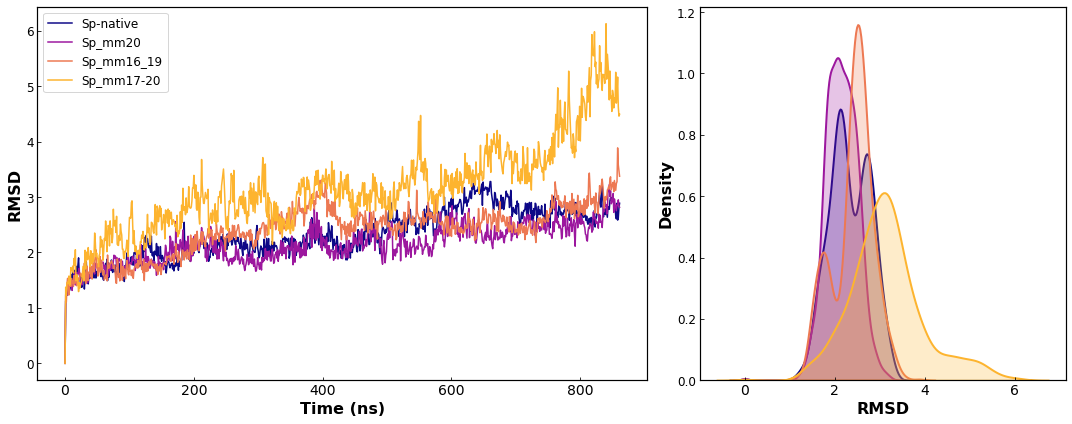

In [52]:
%matplotlib inline
from matplotlib import pyplot as plt

color_dict = ['#0d0887', '#9c179e', '#ed7953', '#fdb42f']
fig = plt.figure(figsize=(15, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[2.5, 1.5])

# Create the RMSD plot
ax1 = fig.add_subplot(gs[0])
data_rmsd_first.plot(ax=ax1, color=color_dict)
plt.legend(['Sp-native', 'Sp_mm20', 'Sp_mm16_19', 'Sp_mm17-20'], fontsize=12)
plt.ylabel('RMSD', fontsize=16, fontweight='bold')
plt.xlabel('Time (ns)',fontsize=16, fontweight='bold')
ax1.spines['left'].set_linewidth(1.2)
ax1.spines['bottom'].set_linewidth(1.2)
ax1.spines['top'].set_linewidth(1.2)
ax1.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')

# Create the density plot on the right
ax2 = fig.add_subplot(gs[1])
sns.kdeplot(data=data_rmsd_first['RMSD_sp_native'], ax=ax2, color=color_dict[0], label='Sp-native', fill=True,linewidth=2)
sns.kdeplot(data=data_rmsd_first['RMSD_sp_mm20'], ax=ax2, color=color_dict[1], label='Sp_mm20', fill=True, linewidth=2)
sns.kdeplot(data=data_rmsd_first['RMSD_sp_mm16-19'], ax=ax2, color=color_dict[2], label='Sp_mm16_19', fill=True, linewidth=2)
sns.kdeplot(data=data_rmsd_first['RMSD_sp_mm17-20'], ax=ax2, color=color_dict[3], label='Sp_mm17-20', fill=True, linewidth=2)
plt.xlabel('RMSD', fontsize=16, fontweight='bold')
plt.ylabel('Density', fontsize=16, fontweight='bold')
#plt.legend(fontsize=12)
ax2.spines['left'].set_linewidth(1.2)
ax2.spines['bottom'].set_linewidth(1.2)
ax2.spines['top'].set_linewidth(1.2)
ax2.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.tight_layout()
plt.savefig('figures/SpCas9_all_RMSD-prot_with_density-stable-part_subplot.svg')
plt.show()


In [47]:
data_rg.head()

,ROG_sp_native,ROG_sp_mm20,ROG_sp_mm16-19,ROG_sp_mm17-20
0,37.941324,37.976939,38.386144,37.357197
1,37.852563,38.029738,38.324967,37.282238
2,37.893962,38.052870,38.410787,37.330074
3,37.913438,37.909308,38.329291,37.240358
4,37.898105,37.924576,38.381822,37.228560


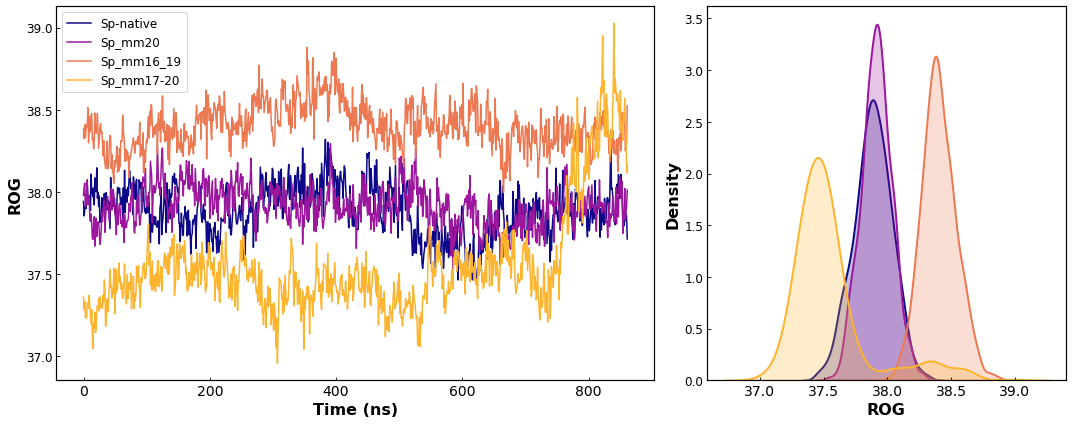

In [53]:
%matplotlib inline

from matplotlib import pyplot as plt


%matplotlib inline
from matplotlib import pyplot as plt

color_dict = ['#0d0887', '#9c179e', '#ed7953', '#fdb42f']
fig = plt.figure(figsize=(15, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[2.5, 1.5])

# Create the RMSD plot
ax1 = fig.add_subplot(gs[0])
data_rg.plot(ax=ax1, color=color_dict)
plt.legend(['Sp-native', 'Sp_mm20', 'Sp_mm16_19', 'Sp_mm17-20'], fontsize=12)
plt.ylabel('ROG', fontsize=16, fontweight='bold')
plt.xlabel('Time (ns)',fontsize=16, fontweight='bold')
ax1.spines['left'].set_linewidth(1.2)
ax1.spines['bottom'].set_linewidth(1.2)
ax1.spines['top'].set_linewidth(1.2)
ax1.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')

# Create the density plot on the right
ax2 = fig.add_subplot(gs[1])
sns.kdeplot(data=data_rg['ROG_sp_native'], ax=ax2, color=color_dict[0], label='Sp-native', fill=True,linewidth=2)
sns.kdeplot(data=data_rg['ROG_sp_mm20'], ax=ax2, color=color_dict[1], label='Sp_mm20', fill=True, linewidth=2)
sns.kdeplot(data=data_rg['ROG_sp_mm16-19'], ax=ax2, color=color_dict[2], label='Sp_mm16_19', fill=True, linewidth=2)
sns.kdeplot(data=data_rg['ROG_sp_mm17-20'], ax=ax2, color=color_dict[3], label='Sp_mm17-20', fill=True, linewidth=2)
plt.xlabel('ROG', fontsize=16, fontweight='bold')
plt.ylabel('Density', fontsize=16, fontweight='bold')
#plt.legend(fontsize=12)
ax2.spines['left'].set_linewidth(1.2)
ax2.spines['bottom'].set_linewidth(1.2)
ax2.spines['top'].set_linewidth(1.2)
ax2.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.tight_layout()
plt.savefig('figures/SpCas9_all_ROG-prot_with_density-stable-part_subplot.svg')
plt.show()


In [4]:
## ROG domain wise
# RuvC- :1-56,718-765,918-1099
# HNH - :780-906
# Rec1 - :94-167,308-497
# Rec2 - :168-307
# Rec3 - :498-713
# sgRNA(20bp) :1365-1384
# tDNA (20bp) :1490-1508
# ntDNA-tDNA :1518-1528,1480-1489

sp_rg_ruvc = list(pt.radgyr(traj1, mask=':1-56,718-765,918-1099'))
spmm20_rg_ruvc = list(pt.radgyr(traj2, mask=':1-56,718-765,918-1099'))
spmm16_19_rg_ruvc = list(pt.radgyr(traj3, mask=':1-56,718-765,918-1099'))
spmm17_20_rg_ruvc = list(pt.radgyr(traj4, mask=':1-56,718-765,918-1099'))

sp_rg_hnh = list(pt.radgyr(traj1, mask=':780-906'))
spmm20_rg_hnh = list(pt.radgyr(traj2, mask=':780-906'))
spmm16_19_rg_hnh = list(pt.radgyr(traj3, mask=':780-906'))
spmm17_20_rg_hnh = list(pt.radgyr(traj4, mask=':780-906'))

sp_rg_rec1= list(pt.radgyr(traj1, mask=':94-167,308-497'))
spmm20_rg_rec1= list(pt.radgyr(traj2, mask=':94-167,308-497'))
spmm16_19_rg_rec1= list(pt.radgyr(traj3, mask=':94-167,308-497'))
spmm17_20_rg_rec1= list(pt.radgyr(traj4, mask=':94-167,308-497'))

sp_rg_rec2= list(pt.radgyr(traj1, mask=':168-307'))
spmm20_rg_rec2= list(pt.radgyr(traj2, mask=':168-307'))
spmm16_19_rg_rec2= list(pt.radgyr(traj3, mask=':168-307'))
spmm17_20_rg_rec2= list(pt.radgyr(traj4, mask=':168-307'))

sp_rg_rec3= list(pt.radgyr(traj1, mask=':498-713'))
spmm20_rg_rec3= list(pt.radgyr(traj2, mask=':498-713'))
spmm16_19_rg_rec3= list(pt.radgyr(traj3, mask=':498-713'))
spmm17_20_rg_rec3= list(pt.radgyr(traj4, mask=':498-713'))

sp_rg_pi= list(pt.radgyr(traj1, mask=':1099-1363'))
spmm20_rg_pi= list(pt.radgyr(traj2, mask=':1099-1363'))
spmm16_19_rg_pi= list(pt.radgyr(traj3, mask=':1099-1363'))
spmm17_20_rg_pi= list(pt.radgyr(traj4, mask=':1099-1363'))

data_rg_ruvc = pd.DataFrame(list(zip(sp_rg_ruvc,spmm20_rg_ruvc,spmm16_19_rg_ruvc,spmm17_20_rg_ruvc)), columns=['sp_native-RuvC','sp_mm20-RuvC','sp_mm16-19-RuvC','sp_mm17-20-RuvC'])
data_rg_hnh = pd.DataFrame(list(zip(sp_rg_hnh,spmm20_rg_hnh,spmm16_19_rg_hnh,spmm17_20_rg_hnh)), columns=['sp_native-HNH','sp_mm20-HNH','sp_mm16-19-HNH','sp_mm17-20-HNH'])
data_rg_rec1 = pd.DataFrame(list(zip(sp_rg_rec1,spmm20_rg_rec1,spmm16_19_rg_rec1,spmm17_20_rg_rec1)), columns=['sp_native-REC1','sp_mm20-REC1','sp_mm16-19-REC1','sp_mm17-20-REC1'])
data_rg_rec2 = pd.DataFrame(list(zip(sp_rg_rec2,spmm20_rg_rec2,spmm16_19_rg_rec2,spmm17_20_rg_rec2)), columns=['sp_native-REC2','sp_mm20-REC2','sp_mm16-19-REC2','sp_mm17-20-REC2'])
data_rg_rec3 = pd.DataFrame(list(zip(sp_rg_rec3,spmm20_rg_rec3,spmm16_19_rg_rec3,spmm17_20_rg_rec3)), columns=['sp_native-REC3','sp_mm20-REC3','sp_mm16-19-REC3','sp_mm17-20-REC3'])
#data_rg_wed = pd.DataFrame(list(zip(sp_rg_wed,spmm20_rg_wed,spmm16_19_rg_wed,spmm17_20_rg_wed)), columns=['sp_native-WED','sp_mm20-WED','sp_mm16-19-WED','sp_mm17-20-WED'])
data_rg_pi = pd.DataFrame(list(zip(sp_rg_pi,spmm20_rg_pi,spmm16_19_rg_pi,spmm17_20_rg_pi)), columns=['sp_native-PI','sp_mm20-PI','sp_mm16-19-PI','sp_mm17-20-PI'])

In [15]:

li = [round(value, 2) for value in data_rg_pi.mean()]
std = [round(value, 3) for value in data_rg_pi.std()]
print(li, std)

[25.23, 25.99, 25.19, 25.49] [0.208, 0.199, 0.143, 0.208]


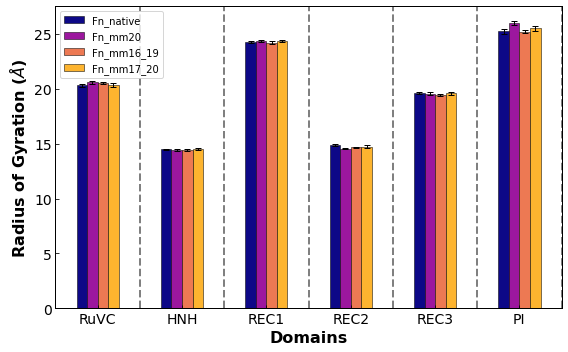

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create data
df_mean = pd.DataFrame([['RuVC', 20.31, 20.57, 20.55, 20.34], ['HNH', 14.48, 14.44, 14.45, 14.49], ['REC1', 24.26, 24.33, 24.2, 24.35],
['REC2', 14.84, 14.54, 14.66, 14.73], ['REC3', 19.61, 19.56, 19.43, 19.58], ['PI',25.23, 25.99, 25.19, 25.49]],
 columns=['Domains', 'Fn_native', 'Fn_mm20', 'Fn_mm16_19', 'Fn_mm17_20']) 

df_std=pd.DataFrame([['RuVC', 0.164, 0.164, 0.101, 0.163], ['HNH', 0.072, 0.071, 0.085, 0.076], ['REC1',0.12, 0.113, 0.106, 0.109],
['REC2',0.095, 0.056, 0.077, 0.1387], ['REC3',0.106, 0.113, 0.12, 0.12],  ['PI',0.208, 0.199, 0.143, 0.208]],
 columns=['Domains', 'Fn_native', 'Fn_mm20', 'Fn_mm16_19', 'Fn_mm17_20'])
  
df_mean.set_index('Domains', inplace=True)
df_std.set_index('Domains', inplace=True)

color_dict=['#0d0887','#9c179e','#ed7953','#fdb42f']

# Plot grouped bar chart with error bars
ax = df_mean.plot(kind='bar', yerr=df_std, figsize=(8,5),
                  color=color_dict, error_kw={'elinewidth': 1.0, 'capsize': 3}, edgecolor='black', linewidth=0.5, width=0.5)

# Set x-axis label
ax.set_xlabel('Domains', fontsize=16, fontweight='bold')
ax.set_ylabel('Radius of Gyration ($\AA$)', fontsize=16, fontweight='bold')

ax = plt.gca()
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)

# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')

plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=10)

# Add vertical lines between groups
for i in range(0, len(df_mean)):
    plt.axvline(x=i + 0.5, color='gray', linestyle='--', linewidth=2.0)
plt.tight_layout()
plt.savefig('figures/SpCas9_all_domain-wise-ROG_stable-part.svg')
plt.show()

In [20]:
## RMSF domain wise

sp_rmsf_ruvc = list(pt.rmsf(traj1, mask=':1-56,718-765,918-1099', options='byres').T[1])
spmm20_rmsf_ruvc = list(pt.rmsf(traj2, mask=':1-56,718-765,918-1099', options='byres').T[1])
spmm16_19_rmsf_ruvc = list(pt.rmsf(traj3, mask=':1-56,718-765,918-1099', options='byres').T[1])
spmm17_20_rmsf_ruvc = list(pt.rmsf(traj4, mask=':1-56,718-765,918-1099', options='byres').T[1])

sp_rmsf_hnh = list(pt.rmsf(traj1, mask=':780-906', options='byres').T[1])
spmm20_rmsf_hnh = list(pt.rmsf(traj2, mask=':780-906', options='byres').T[1])
spmm16_19_rmsf_hnh = list(pt.rmsf(traj3, mask=':780-906', options='byres').T[1])
spmm17_20_rmsf_hnh = list(pt.rmsf(traj4, mask=':780-906', options='byres').T[1])

sp_rmsf_rec1= list(pt.rmsf(traj1, mask=':94-167,308-497', options='byres').T[1])
spmm20_rmsf_rec1= list(pt.rmsf(traj2, mask=':94-167,308-497', options='byres').T[1])
spmm16_19_rmsf_rec1= list(pt.rmsf(traj3, mask=':94-167,308-497', options='byres').T[1])
spmm17_20_rmsf_rec1= list(pt.rmsf(traj4, mask=':94-167,308-497', options='byres').T[1])

sp_rmsf_rec2= list(pt.rmsf(traj1, mask=':168-307', options='byres').T[1])
spmm20_rmsf_rec2= list(pt.rmsf(traj2, mask=':168-307', options='byres').T[1])
spmm16_19_rmsf_rec2= list(pt.rmsf(traj3, mask=':168-307', options='byres').T[1])
spmm17_20_rmsf_rec2= list(pt.rmsf(traj4, mask=':168-307', options='byres').T[1])

sp_rmsf_rec3= list(pt.rmsf(traj1, mask=':498-713', options='byres').T[1])
spmm20_rmsf_rec3=list( pt.rmsf(traj2, mask=':498-713', options='byres').T[1])
spmm16_19_rmsf_rec3= list(pt.rmsf(traj3, mask=':498-713', options='byres').T[1])
spmm17_20_rmsf_rec3= list(pt.rmsf(traj4, mask=':498-713', options='byres').T[1])

sp_rmsf_pi= list(pt.rmsf(traj1, mask=':1099-1363', options='byres').T[1])
spmm20_rmsf_pi= list(pt.rmsf(traj2, mask=':1099-1363', options='byres').T[1])
spmm16_19_rmsf_pi= list(pt.rmsf(traj3, mask=':1099-1363', options='byres').T[1])
spmm17_20_rmsf_pi= list(pt.rmsf(traj4, mask=':1099-1363', options='byres').T[1])

data_rmsf_ruvc = pd.DataFrame(zip(sp_rmsf_ruvc,spmm20_rmsf_ruvc,spmm16_19_rmsf_ruvc,spmm17_20_rmsf_ruvc), 
columns=['sp_native-RuvC','sp_mm20-RuvC','sp_mm16-19-RuvC','sp_mm17-20-RuvC'])
data_rmsf_hnh = pd.DataFrame(zip(sp_rmsf_hnh,spmm20_rmsf_hnh,spmm16_19_rmsf_hnh,spmm17_20_rmsf_hnh), columns=['sp_native-HNH','sp_mm20-HNH','sp_mm16-19-HNH','sp_mm17-20-HNH'])
data_rmsf_rec1 = pd.DataFrame(zip(sp_rmsf_rec1,spmm20_rmsf_rec1,spmm16_19_rmsf_rec1,spmm17_20_rmsf_rec1), columns=['sp_native-REC1','sp_mm20-REC1','sp_mm16-19-REC1','sp_mm17-20-REC1'])
data_rmsf_rec2 = pd.DataFrame(zip(sp_rmsf_rec2,spmm20_rmsf_rec2,spmm16_19_rmsf_rec2,spmm17_20_rmsf_rec2), columns=['sp_native-REC2','sp_mm20-REC2','sp_mm16-19-REC2','sp_mm17-20-REC2'])
data_rmsf_rec3 = pd.DataFrame(zip(sp_rmsf_rec3,spmm20_rmsf_rec3,spmm16_19_rmsf_rec3,spmm17_20_rmsf_rec3), columns=['sp_native-REC3','sp_mm20-REC3','sp_mm16-19-REC3','sp_mm17-20-REC3'])
#data_rmsf_wed = pd.DataFrame(zip(sp_rmsf_wed,spmm20_rmsf_wed,spmm16_19_rmsf_wed,spmm17_20_rmsf_wed), columns=['sp_native-WED','sp_mm20-WED','sp_mm16-19-WED','sp_mm17-20-WED'])
data_rmsf_pi = pd.DataFrame(zip(sp_rmsf_pi,spmm20_rmsf_pi,spmm16_19_rmsf_pi,spmm17_20_rmsf_pi), columns=['sp_native-PI','sp_mm20-PI','sp_mm16-19-PI','sp_mm17-20-PI'])

In [29]:
li = [round(value, 2) for value in data_rmsf_pi.mean()]
std = [round(value, 3) for value in data_rmsf_ruvc.std()]
print(li, std)

[1.76, 1.93, 1.74, 1.87] [1.198, 1.495, 0.948, 1.864]


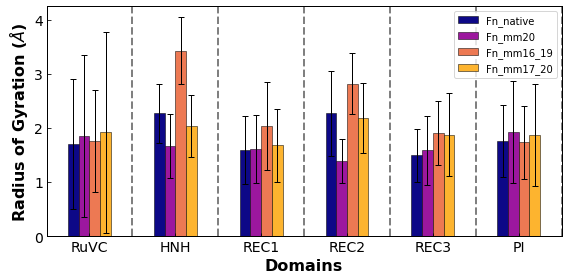

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create data
df_mean = pd.DataFrame([['RuVC', 1.71, 1.86, 1.76, 1.92], ['HNH', 2.27, 1.67, 3.43, 2.04], ['REC1',1.6, 1.62, 2.04, 1.68],
['REC2', 2.27, 1.39, 2.82, 2.19], ['REC3', 1.5, 1.59, 1.91, 1.88], ['PI',1.76, 1.93, 1.74, 1.87]],
 columns=['Domains', 'Fn_native', 'Fn_mm20', 'Fn_mm16_19', 'Fn_mm17_20']) 

df_std=pd.DataFrame([['RuVC', 1.198, 1.495, 0.948, 1.864], ['HNH', 0.542, 0.59, 0.616, 0.579], ['REC1',0.63, 0.627, 0.813, 0.668],
['REC2',0.782, 0.405, 0.562, 0.651], ['REC3',0.491, 0.642, 0.592, 0.759],  ['PI',0.665, 0.947, 0.672, 0.946]],
 columns=['Domains', 'Fn_native', 'Fn_mm20', 'Fn_mm16_19', 'Fn_mm17_20'])
  
df_mean.set_index('Domains', inplace=True)
df_std.set_index('Domains', inplace=True)

color_dict=['#0d0887','#9c179e','#ed7953','#fdb42f']

# Plot grouped bar chart with error bars
ax = df_mean.plot(kind='bar', yerr=df_std, figsize=(8,4),
                  color=color_dict, error_kw={'elinewidth': 1.0, 'capsize': 3}, edgecolor='black', linewidth=0.5, width=0.5)

# Set x-axis label
ax.set_xlabel('Domains', fontsize=16, fontweight='bold')
ax.set_ylabel('Radius of Gyration ($\AA$)', fontsize=16, fontweight='bold')

ax = plt.gca()
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)

# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')

plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=10)

# Add vertical lines between groups
for i in range(0, len(df_mean)):
    plt.axvline(x=i + 0.5, color='gray', linestyle='--', linewidth=2.0)
plt.tight_layout()
plt.savefig('figures/SpCas9_all_domain-wise-RMSF_stable-part.svg')
plt.show()

In [2]:
color_dict=['#0d0887','#9c179e','#ed7953','#fdb42f']
data_rg.columns=['Sp_native','Sp_mm20','Sp_mm16_19','Sp_mm17-20']
data_rg_save=data_rg.stack().reset_index().sort_values(by=['level_1'], ascending=False).iloc[:,1:]
data_rg_save.columns=['Label','ROG']
data_rg_save.to_csv('SpCas9_all-protein_ROG.csv', index=False)
data_rg_save.head()

In [7]:
import pandas as pd
sp_rmsf=pd.read_csv('/storage3/gayatrip/EMX1-Sp_native_rep/Sp_native_300-500ns.csv')
spmm20_rmsf=pd.read_csv('/storage3/gayatrip/EMX1-Sp_mm20_rep/Spmm20_300-500ns.csv')
spmm16_19_rmsf=pd.read_csv('/storage3/gayatrip/EMX1-Sp_mm16_19_rep/Spmm16_19_300-500ns.csv')
spmm17_20_rmsf=pd.read_csv('/storage3/gayatrip/EMX1-Sp_mm17-20_rep/Spmm17-20_300-500ns.csv')

data_rmsf=pd.DataFrame()
data_rmsf['Sp_RMSF']=sp_rmsf
data_rmsf['Spmm20_RMSF']=spmm20_rmsf
data_rmsf['Spmm16-19_RMSF']=spmm16_19_rmsf
data_rmsf['Spmm17-20_RMSF']=spmm17_20_rmsf
data_rmsf.head()

,Sp_RMSF,Spmm20_RMSF,Spmm16-19_RMSF,Spmm17-20_RMSF
0,1.5832,1.4826,1.6086,2.4218
1,1.0165,0.9248,1.1298,1.4199
2,0.8607,0.7661,0.9540,0.9350
3,0.7991,0.7222,0.8567,0.8144
4,0.7402,0.6439,0.7304,0.7401


In [5]:
spmm17_20_rmsf

,#Res,AtomicFlx
NaN,3.0000,2.4218
NaN,4.0000,1.4199
NaN,5.0000,0.9350
NaN,6.0000,0.8144
NaN,7.0000,0.7401
...,...,...
1360.0,1.1912,NaN
1361.0,1.3309,NaN
1362.0,1.4010,NaN
1363.0,1.8344,NaN


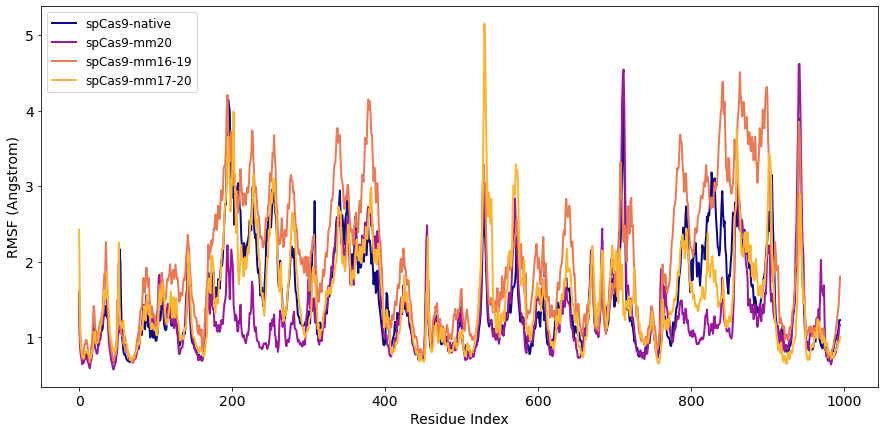

In [14]:
color_dict=['#0d0887','#9c179e','#ed7953','#fdb42f']
data_rmsf.plot(color=color_dict,linewidth=2.0)
plt.legend(['spCas9-native','spCas9-mm20','spCas9-mm16-19','spCas9-mm17-20'],fontsize=12)
plt.ylabel('RMSF (Angstrom)', fontsize=14)
plt.xlabel('Residue Index',fontsize=14)
plt.gcf().set_size_inches(15,7)

#D911-b18 Mm-D1027 – 1506

R904-b17 Mm-R1020 -1505

S908-b18 Mm-S1024-1506

In [41]:
# # compute pca heteroduplex 
sp_pca=pt.pca(traj1, mask=':1365-1384,1490-1508', n_vecs=2)
spmm20_pca=pt.pca(traj2, mask=':1365-1384,1490-1508', n_vecs=2)
spmm16_19_pca=pt.pca(traj4,mask=':1365-1384,1490-1508', n_vecs=2)
spmm17_20_pca=pt.pca(traj3,mask=':1365-1384,1490-1508', n_vecs=2)

In [40]:
df1=pd.DataFrame(list(zip(sp_pca[0][0], sp_pca[0][1])), columns=['Comp1','Comp2'])
df2=pd.DataFrame(list(zip(spmm20_pca[0][0], spmm20_pca[0][1])), columns=['Comp1','Comp2'])
df3=pd.DataFrame(list(zip(spmm16_19_pca[0][0], spmm16_19_pca[0][1])), columns=['Comp1','Comp2'])
df4=pd.DataFrame(list(zip(spmm17_20_pca[0][0], spmm17_20_pca[0][1])), columns=['Comp1','Comp2'])
df=pd.concat([df1,df2,df3,df4])
label=len(df1)*'SpCas9,'+len(df2)*'Spmm20,'+len(df3)*'Spmm16_19,'+len(df4)*'Spmm17-20,'

In [67]:
sp_pca[0].shape

(2, 862)

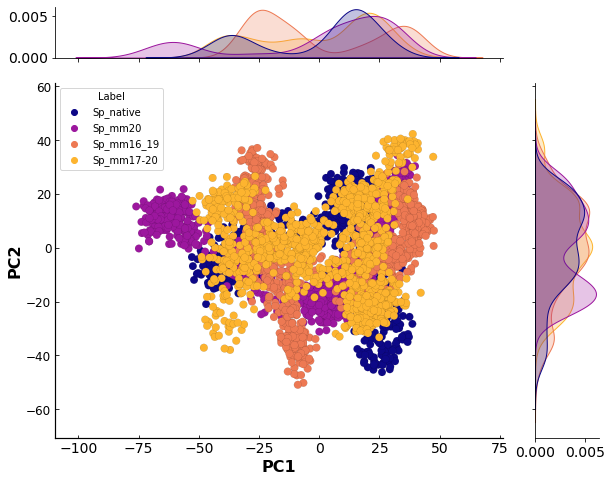

In [42]:
df1 = pd.DataFrame({'PC1': sp_pca[0][0], 'PC2': sp_pca[0][1]})
df2 = pd.DataFrame({'PC1': spmm20_pca[0][0], 'PC2': spmm20_pca[0][1]})
df3 = pd.DataFrame({'PC1': spmm16_19_pca[0][0], 'PC2': spmm16_19_pca[0][1]})
df4 = pd.DataFrame({'PC1': spmm17_20_pca[0][0], 'PC2': spmm17_20_pca[0][1]})

df1['Label']=['Sp_native']*len(df1)
df2['Label']=['Sp_mm20']*len(df2)
df3['Label']=['Sp_mm16_19']*len(df3)
df4['Label']=['Sp_mm17-20']*len(df4)


scatter_kws = {
    'edgecolor': 'black',   # Set edge color to black
    's': 60,                 # Marker size
    'linewidths': 0.09       # Edge linewidth
}

color_dict = ['#0d0887', '#9c179e', '#ed7953', '#fdb42f']

pca_dup=pd.concat([df1,df2,df3,df4])
#sns.jointplot(data=pca_dup, x='PC1', y='PC2', kind='scatter', hue='Label', alpha=1, palette=color_dict, edgecolors='black',s=60, linewidths=2)
sns.jointplot(data=pca_dup, x='PC1', y='PC2', kind='scatter', hue='Label',joint_kws = {'ec': 'black', 'linewidth': 0.07, 's':60}, alpha=1, palette=color_dict, 
              space=0.5, ratio=5, marginal_ticks=True, marginal_kws= {'linewidths': 1}, legend=True)


plt.ylabel('PC2', fontsize=16, fontweight='bold')
plt.xlabel('PC1',fontsize=16, fontweight='bold')
ax = plt.gca()
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
#plt.savefig('figures/SpCas9_all_hybrid_pca-with-density.svg')
#plt.title('PCA of SpCas9 Hybrid')
plt.gcf().set_size_inches(9, 7)

#sns.jointplot(data=sp_pca[0][0], x="total_bill", y="tip", kind="reg", marker="*")

In [46]:
pca_dup.to_csv('Sp_NA_csvs/SP_PCA_PCs_hybrid.csv', index=False)

In [47]:
# PCA HNH
sp_pca_hnh=pt.pca(traj1, ":780-906", n_vecs=2)
sp_mm20_pca_hnh=pt.pca(traj2, ":780-906", n_vecs=2)
sp_mm16_19_pca_hnh=pt.pca(traj4, ":780-906", n_vecs=2)
sp_mm17_10_pca_hnh=pt.pca(traj3, ":780-906", n_vecs=2)

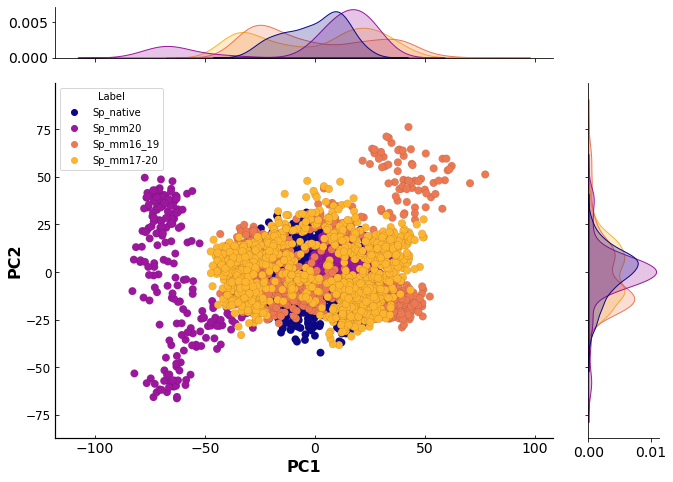

In [49]:
df1 = pd.DataFrame({'PC1': sp_pca_hnh[0][0], 'PC2': sp_pca_hnh[0][1]})
df2 = pd.DataFrame({'PC1': sp_mm20_pca_hnh[0][0], 'PC2': sp_mm20_pca_hnh[0][1]})
df3 = pd.DataFrame({'PC1': sp_mm16_19_pca_hnh[0][0], 'PC2': sp_mm16_19_pca_hnh[0][1]})
df4 = pd.DataFrame({'PC1': sp_mm17_10_pca_hnh[0][0], 'PC2': sp_mm17_10_pca_hnh[0][1]})

df1['Label']=['Sp_native']*len(df1)
df2['Label']=['Sp_mm20']*len(df2)
df3['Label']=['Sp_mm16_19']*len(df3)
df4['Label']=['Sp_mm17-20']*len(df4)

color_dict = ['#0d0887', '#9c179e', '#ed7953', '#fdb42f']

pca_dup=pd.concat([df1,df2,df3,df4])
#sns.jointplot(data=pca_dup, x='PC1', y='PC2', kind='scatter', hue='Label', alpha=1, palette=color_dict, edgecolors='black',s=60, linewidths=2)
sns.jointplot(data=pca_dup, x='PC1', y='PC2', kind='scatter', hue='Label',joint_kws = {'ec': 'black', 'linewidth': 0.07, 's':60}, alpha=1, palette=color_dict, 
              space=0.5, ratio=5, marginal_ticks=True, marginal_kws= {'linewidths': 1}, legend=True)

#plt.legend(['Sp-native','Sp_mm20','Sp_mm16_19','Sp_mm17-20'],fontsize=12)
plt.ylabel('PC2', fontsize=16, fontweight='bold')
plt.xlabel('PC1',fontsize=16, fontweight='bold')
ax = plt.gca()

ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
#plt.savefig('figures/SpCas9_all_HNH_pca_hnh-with-density.svg')
#plt.title('PCA of SpCas9 Hybrid')
plt.gcf().set_size_inches(10, 7)

#sns.jointplot(data=sp_pca_hnh[0][0], x="total_bill", y="tip", kind="reg", marker="*")

In [50]:
pca_dup.to_csv('Sp_NA_csvs/SP_PCA_PCs_HNH.csv', index=False)

In [51]:
# PCA RuvC
sp_pca_ruvc=pt.pca(traj1, ':1-56,718-765,918-1099', n_vecs=2)
sp_mm20_pca_ruvc=pt.pca(traj2, ':1-56,718-765,918-1099', n_vecs=2)
sp_mm16_19_pca_ruvc=pt.pca(traj4, ':1-56,718-765,918-1099', n_vecs=2)
sp_mm17_10_pca_ruvc=pt.pca(traj3, ':1-56,718-765,918-1099', n_vecs=2)

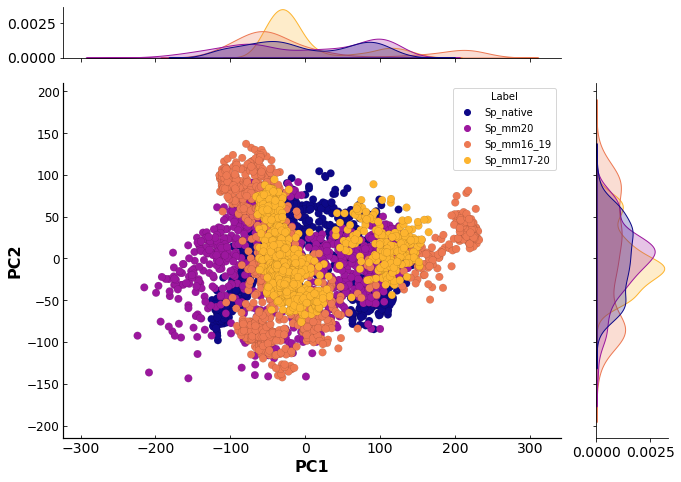

In [52]:
df1 = pd.DataFrame({'PC1': sp_pca_ruvc[0][0], 'PC2': sp_pca_ruvc[0][1]})
df2 = pd.DataFrame({'PC1': sp_mm20_pca_ruvc[0][0], 'PC2': sp_mm20_pca_ruvc[0][1]})
df3 = pd.DataFrame({'PC1': sp_mm16_19_pca_ruvc[0][0], 'PC2': sp_mm16_19_pca_ruvc[0][1]})
df4 = pd.DataFrame({'PC1': sp_mm17_10_pca_ruvc[0][0], 'PC2': sp_mm17_10_pca_ruvc[0][1]})

df1['Label']=['Sp_native']*len(df1)
df2['Label']=['Sp_mm20']*len(df2)
df3['Label']=['Sp_mm16_19']*len(df3)
df4['Label']=['Sp_mm17-20']*len(df4)

color_dict = ['#0d0887', '#9c179e', '#ed7953', '#fdb42f']

pca_dup=pd.concat([df1,df2,df3,df4])
#sns.jointplot(data=pca_dup, x='PC1', y='PC2', kind='scatter', hue='Label', alpha=1, palette=color_dict, edgecolors='black',s=60, linewidths=2)
sns.jointplot(data=pca_dup, x='PC1', y='PC2', kind='scatter', hue='Label',joint_kws = {'ec': 'black', 'linewidth': 0.07, 's':60}, alpha=1, palette=color_dict, 
              space=0.5, ratio=5, marginal_ticks=True, marginal_kws= {'linewidths': 1},legend=True)

#plt.legend(['Sp-native','Sp_mm20','Sp_mm16_19','Sp_mm17-20'],fontsize=12)
plt.ylabel('PC2', fontsize=16, fontweight='bold')
plt.xlabel('PC1',fontsize=16, fontweight='bold')
ax = plt.gca()
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
#plt.savefig('figures/SpCas9_all_ruvc_pca_ruvc-with-density.svg')
#plt.title('PCA of SpCas9 Hybrid')
plt.gcf().set_size_inches(10, 7)

In [53]:
pca_dup.to_csv('Sp_NA_csvs/SP_PCA_PCs_RuvC.csv', index=False)

In [54]:
# PCA REC1
sp_pca_rec1=pt.pca(traj1, ':94-167,308-497', n_vecs=2)
sp_mm20_pca_rec1=pt.pca(traj2, ':94-167,308-497', n_vecs=2)
sp_mm16_19_pca_rec1=pt.pca(traj4, ':94-167,308-497', n_vecs=2)
sp_mm17_10_pca_rec1=pt.pca(traj3, ':94-167,308-497', n_vecs=2)

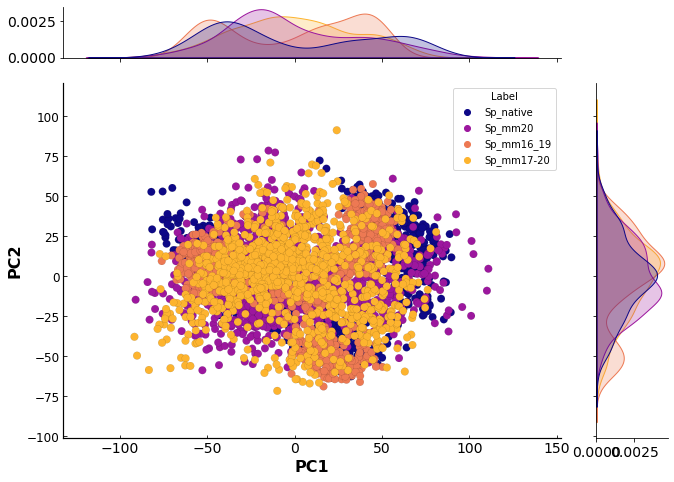

In [55]:
df1 = pd.DataFrame({'PC1': sp_pca_rec1[0][0], 'PC2': sp_pca_rec1[0][1]})
df2 = pd.DataFrame({'PC1': sp_mm20_pca_rec1[0][0], 'PC2': sp_mm20_pca_rec1[0][1]})
df3 = pd.DataFrame({'PC1': sp_mm16_19_pca_rec1[0][0], 'PC2': sp_mm16_19_pca_rec1[0][1]})
df4 = pd.DataFrame({'PC1': sp_mm17_10_pca_rec1[0][0], 'PC2': sp_mm17_10_pca_rec1[0][1]})

# sp_pca_rec1=pt.pca(traj1, ":780-906", n_vecs=2)
# sp_mm20_pca_rec1=pt.pca(traj2, ":780-906", n_vecs=2)
# sp_mm16_19_pca_rec1=pt.pca(traj4, ":780-906", n_vecs=2)
# sp_mm17_10_pca_rec1=pt.pca(traj3, ":780-906", n_vecs=2)

df1['Label']=['Sp_native']*len(df1)
df2['Label']=['Sp_mm20']*len(df2)
df3['Label']=['Sp_mm16_19']*len(df3)
df4['Label']=['Sp_mm17-20']*len(df4)

color_dict = ['#0d0887', '#9c179e', '#ed7953', '#fdb42f']

pca_dup=pd.concat([df1,df2,df3,df4])
#sns.jointplot(data=pca_dup, x='PC1', y='PC2', kind='scatter', hue='Label', alpha=1, palette=color_dict, edgecolors='black',s=60, linewidths=2)
sns.jointplot(data=pca_dup, x='PC1', y='PC2', kind='scatter', hue='Label',joint_kws = {'ec': 'black', 'linewidth': 0.07, 's':60}, alpha=1, palette=color_dict, 
              space=0.5, ratio=5, marginal_ticks=True, marginal_kws= {'linewidths': 1},legend=True)

#plt.legend(['Sp-native','Sp_mm20','Sp_mm16_19','Sp_mm17-20'],fontsize=12)
plt.ylabel('PC2', fontsize=16, fontweight='bold')
plt.xlabel('PC1',fontsize=16, fontweight='bold')
ax = plt.gca()
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
#plt.savefig('figures/SpCas9_all_rec1_pca_rec1-with-density.svg')
#plt.title('PCA of SpCas9 Hybrid')
plt.gcf().set_size_inches(10, 7)

#sns.jointplot(data=sp_pca_rec1[0][0], x="total_bill", y="tip", kind="reg", marker="*")

In [56]:
pca_dup.to_csv('Sp_NA_csvs/SP_PCA_PCs_REC1.csv', index=False)

In [57]:
# PCA REC2
sp_pca_rec2=pt.pca(traj1, ':168-307', n_vecs=2)
sp_mm20_pca_rec2=pt.pca(traj2, ':168-307', n_vecs=2)
sp_mm16_19_pca_rec2=pt.pca(traj4, ':168-307', n_vecs=2)
sp_mm17_10_pca_rec2=pt.pca(traj3, ':168-307', n_vecs=2)

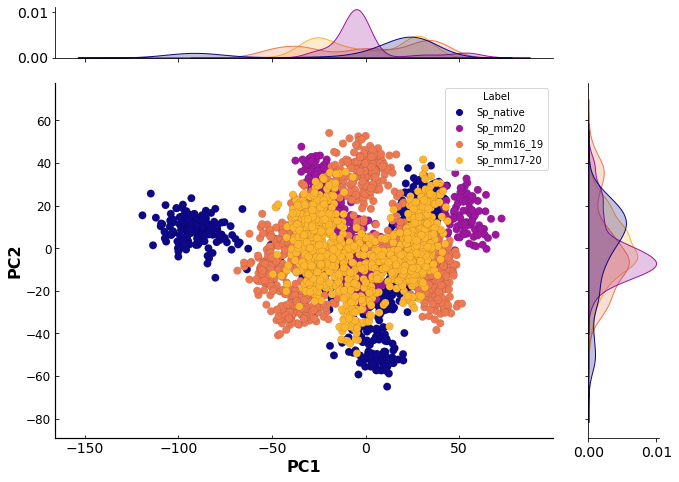

In [58]:
df1 = pd.DataFrame({'PC1': sp_pca_rec2[0][0], 'PC2': sp_pca_rec2[0][1]})
df2 = pd.DataFrame({'PC1': sp_mm20_pca_rec2[0][0], 'PC2': sp_mm20_pca_rec2[0][1]})
df3 = pd.DataFrame({'PC1': sp_mm16_19_pca_rec2[0][0], 'PC2': sp_mm16_19_pca_rec2[0][1]})
df4 = pd.DataFrame({'PC1': sp_mm17_10_pca_rec2[0][0], 'PC2': sp_mm17_10_pca_rec2[0][1]})

df1['Label']=['Sp_native']*len(df1)
df2['Label']=['Sp_mm20']*len(df2)
df3['Label']=['Sp_mm16_19']*len(df3)
df4['Label']=['Sp_mm17-20']*len(df4)

color_dict = ['#0d0887', '#9c179e', '#ed7953', '#fdb42f']

pca_dup=pd.concat([df1,df2,df3,df4])
#sns.jointplot(data=pca_dup, x='PC1', y='PC2', kind='scatter', hue='Label', alpha=1, palette=color_dict, edgecolors='black',s=60, linewidths=2)
sns.jointplot(data=pca_dup, x='PC1', y='PC2', kind='scatter', hue='Label',joint_kws = {'ec': 'black', 'linewidth': 0.07, 's':60}, alpha=1, palette=color_dict, 
              space=0.5, ratio=5, marginal_ticks=True, marginal_kws= {'linewidths': 1},legend=True)

#plt.legend(['Sp-native','Sp_mm20','Sp_mm16_19','Sp_mm17-20'],fontsize=12)
plt.ylabel('PC2', fontsize=16, fontweight='bold')
plt.xlabel('PC1',fontsize=16, fontweight='bold')
ax = plt.gca()
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
#plt.savefig('figures/SpCas9_all_rec2_pca_rec2-with-density.svg')
#plt.title('PCA of SpCas9 Hybrid')
plt.gcf().set_size_inches(10, 7)

#sns.jointplot(data=sp_pca_rec2[0][0], x="total_bill", y="tip", kind="reg", marker="*")

In [59]:
pca_dup.to_csv('Sp_NA_csvs/SP_PCA_PCs_REC2.csv', index=False)

In [60]:
# PCA REC3
sp_pca_rec3=pt.pca(traj1, ':498-713', n_vecs=2)
sp_mm20_pca_rec3=pt.pca(traj2, ':498-713', n_vecs=2)
sp_mm16_19_pca_rec3=pt.pca(traj4, ':498-713', n_vecs=2)
sp_mm17_10_pca_rec3=pt.pca(traj3, ':498-713', n_vecs=2)

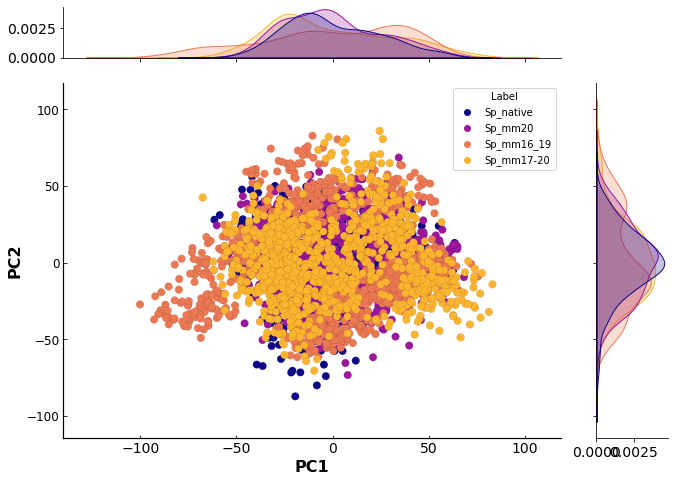

In [61]:
df1 = pd.DataFrame({'PC1': sp_pca_rec3[0][0], 'PC2': sp_pca_rec3[0][1]})
df2 = pd.DataFrame({'PC1': sp_mm20_pca_rec3[0][0], 'PC2': sp_mm20_pca_rec3[0][1]})
df3 = pd.DataFrame({'PC1': sp_mm16_19_pca_rec3[0][0], 'PC2': sp_mm16_19_pca_rec3[0][1]})
df4 = pd.DataFrame({'PC1': sp_mm17_10_pca_rec3[0][0], 'PC2': sp_mm17_10_pca_rec3[0][1]})

# sp_pca_rec3=pt.pca(traj1, ":780-906", n_vecs=2)
# sp_mm20_pca_rec3=pt.pca(traj2, ":780-906", n_vecs=2)
# sp_mm16_19_pca_rec3=pt.pca(traj4, ":780-906", n_vecs=2)
# sp_mm17_10_pca_rec3=pt.pca(traj3, ":780-906", n_vecs=2)

df1['Label']=['Sp_native']*len(df1)
df2['Label']=['Sp_mm20']*len(df2)
df3['Label']=['Sp_mm16_19']*len(df3)
df4['Label']=['Sp_mm17-20']*len(df4)

color_dict = ['#0d0887', '#9c179e', '#ed7953', '#fdb42f']

pca_dup=pd.concat([df1,df2,df3,df4])
#sns.jointplot(data=pca_dup, x='PC1', y='PC2', kind='scatter', hue='Label', alpha=1, palette=color_dict, edgecolors='black',s=60, linewidths=2)
sns.jointplot(data=pca_dup, x='PC1', y='PC2', kind='scatter', hue='Label',joint_kws = {'ec': 'black', 'linewidth': 0.07, 's':60}, alpha=1, palette=color_dict, 
              space=0.5, ratio=5, marginal_ticks=True, marginal_kws= {'linewidths': 1},legend=True)

#plt.legend(['Sp-native','Sp_mm20','Sp_mm16_19','Sp_mm17-20'],fontsize=12)
plt.ylabel('PC2', fontsize=16, fontweight='bold')
plt.xlabel('PC1',fontsize=16, fontweight='bold')
ax = plt.gca()
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
#plt.savefig('figures/SpCas9_all_rec3_pca_rec3-with-density.svg')
#plt.title('PCA of SpCas9 Hybrid')
plt.gcf().set_size_inches(10, 7)

#sns.jointplot(data=sp_pca_rec3[0][0], x="total_bill", y="tip", kind="reg", marker="*")

In [62]:
pca_dup.to_csv('Sp_NA_csvs/SP_PCA_PCs_REC3.csv', index=False)

In [13]:
nat_nuc_pc1=sp_pca_ruvc[0][0]+ sp_pca_hnh[0][0] 
mm20_nuc_pc1=spmm20_pca_ruvc[0][0]+ spmm20_pca_hnh[0][0]
mm16_19_nuc_pc1=spmm16_19_pca_ruvc[0][0]+ spmm16_19_pca_hnh[0][0]
mm17_20_nuc_pc1=spmm17_20_pca_ruvc[0][0]+ spmm17_20_pca_hnh[0][0]

NameError: name 'spmm20_pca_ruvc' is not defined

In [179]:
import pandas as pd
df1_rec2=pd.DataFrame(list(zip(list(sp_pca_rec2[0][0]),list(sp_pca_rec2[0][1]))), columns=['PC1','PC2'])
df2_rec2=pd.DataFrame(list(zip(list(sp_mm20_pca_rec2[0][0]),list(sp_mm20_pca_rec2[0][1]))),columns=['PC1','PC2'])
df3_rec2=pd.DataFrame(list(zip(list(sp_mm16_19_pca_rec2[0][0]),list(sp_mm16_19_pca_rec2[0][1]))),columns=['PC1','PC2'])
df4_rec2=pd.DataFrame(list(zip(list(sp_mm17_10_pca_rec2[0][0]),list(sp_mm17_10_pca_rec2[0][1]))),columns=['PC1','PC2'])

df1_rec2=df1_rec2.iloc[:len(df4_rec2),:df4_rec2.shape[1]] # trim dataframe
df2_rec2=df2_rec2.iloc[:len(df4_rec2),:df4_rec2.shape[1]]
df3_rec2=df3_rec2.iloc[:len(df4_rec2),:df4_rec2.shape[1]]
df4_rec2=df4_rec2.iloc[:len(df4_rec2),:df4_rec2.shape[1]]


li_rd=[]
li_nat=[]
li_mm20=[]
li_mm16_19=[]
li_mm17_20=[]
for i in range(len(df4_rec2)):
    li_nat.append('Sp_native')

for i in range(len(df4_rec2)):
    li_mm20.append('Sp_mm20')

for i in range(len(df4_rec2)):
    li_mm16_19.append('Sp_mm16_19')

for i in range(len(df4_rec2)):
    li_mm17_20.append('Sp_mm17_20')
    
    
df1_rec2['Labels']=li_nat
df2_rec2['Labels']=li_mm20
df3_rec2['Labels']=li_mm16_19
df4_rec2['Labels']=li_mm17_20

In [191]:
# PC1=list(data[0][0])
# PC2=list(data[0][1])
sp_pca=pd.DataFrame(list(zip(sp_pca[0][0],sp_pca[0][1])))
spmm20_pca=pd.DataFrame(list(zip(spmm20_pca[0][0],spmm20_pca[0][1])))
sp_pca.head()
#df.to_csv('princpal_comp_sp_mm20.csv',index=False, header=False)

,0,1
0,-32.745823,3.982961
1,-30.205681,6.682460
2,-33.068863,-0.736156
3,-31.351448,4.423116
4,-33.191284,6.705640


In [ ]:
sp_rnp_tdna = pt.native_contacts(traj1, mask=':2-1364', mask2='1480-1509', distance=4.0, ref=sp_traj[1000])

In [6]:
#native contacts between Cas9-RNP and tDNA
pdb='/storage3/gayatrip/EMX1-Sp_native_rep/spnat_10ns_nowat.pdb'
#sp_rnp_tdna = pt.native_contacts(traj1, mask=':2-1364', mask2='1480-1509', distance=4.0, ref=sp_traj[1000])
spmm20_rnp_tdna = pt.native_contacts(traj2, mask=':2-1364', mask2='1480-1509', distance=4.0,ref=spmm20_traj[1000])
spmm17_20_rnp_tdna = pt.native_contacts(traj4, mask=':2-1364', mask2='1480-1509', distance=4.0,ref=spmm17_20_traj[1000])
spmm16_19_rnp_tdna = pt.native_contacts(traj3, mask=':2-1364', mask2='1480-1509', distance=4.0,ref=spmm16_19_traj[1000])
type(spmm20_rnp_tdna[0])

pytraj.datasets.array.DataArray

In [7]:
#native contacts between REC2 and HNH
sp_rec2_hnh = pt.native_contacts(traj1, mask=':168-307', mask2='780-906', distance=4.0 , ref=sp_traj[1000])
spmm20_rec2_hnh = pt.native_contacts(traj2, mask=':168-307', mask2='780-906', distance=4.0, ref=spmm20_traj[1000])
spmm17_20_rec2_hnh = pt.native_contacts(traj4, mask=':168-307', mask2='780-906', distance=4.0, ref=spmm17_20_traj[1000])
spmm16_19_rec2_hnh = pt.native_contacts(traj3, mask=':168-307', mask2='780-906', distance=4.0, ref=spmm16_19_traj[1000])
type(spmm20_rec2_hnh[0])

pytraj.datasets.array.DataArray

In [9]:
nat_rec2_hnh = pd.DataFrame(list(zip(list(sp_rec2_hnh[0]),list(spmm20_rec2_hnh[0]),list(spmm16_19_rec2_hnh[0]),list(spmm17_20_rec2_hnh[0]))), columns=['Sp-REC2-HNH','Spmm20-REC2-HNH','Spmm16,19-REC2-HNH','Spmm17-20-REC2-HNH'])
# natr=list(nat_rec2_hnh[0])
nat_rec2_hnh.head()

,Sp-REC2-HNH,Spmm20-REC2-HNH,"Spmm16,19-REC2-HNH",Spmm17-20-REC2-HNH
0,19360,19215,18672,18716
1,19405,19170,18756,18409
2,19310,19203,18634,18686
3,19329,19201,18632,18535
4,19147,19126,18734,18542


<AxesSubplot:>

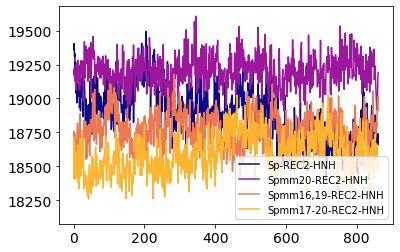

In [12]:
color_dict=['#0d0887','#9c179e','#ed7953','#fdb42f']
nat_rec2_hnh.plot(color=color_dict)

<AxesSubplot:>

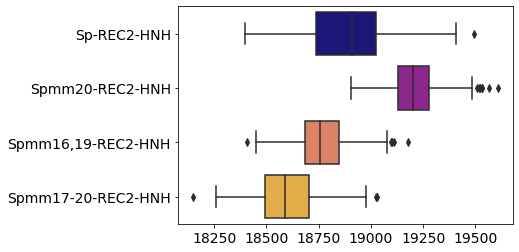

In [13]:
#sns.boxplot(x='System',y='Del Energy', data = nat_rec2_hnh)
#nat_rec2_hnh.boxplot()
sns.boxplot(data=nat_rec2_hnh,orient="h", palette=color_dict)

In [15]:
#native contacts between REC3 and HNH
sp_rec3_hnh = pt.native_contacts(traj1, mask='498-713', mask2='780-906', distance=4.0, ref=sp_traj[1000])
spmm20_rec3_hnh = pt.native_contacts(traj2, mask='498-713', mask2='780-906', distance=4.0, ref=spmm20_traj[1000])
spmm17_20_rec3_hnh = pt.native_contacts(traj4, mask='498-713', mask2='780-906', distance=4.0, ref=spmm17_20_traj[1000])
spmm16_19_rec3_hnh = pt.native_contacts(traj3, mask='498-713', mask2='780-906', distance=4.0, ref=spmm16_19_traj[1000])
type(spmm20_rec3_hnh[0])

pytraj.datasets.array.DataArray

<AxesSubplot:>

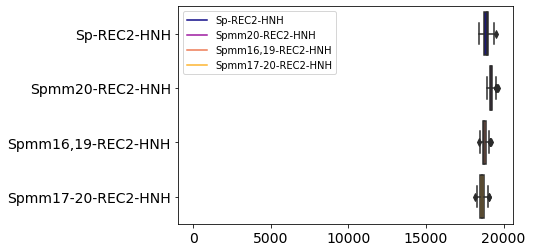

In [17]:
nat_rec3_hnh = pd.DataFrame(list(zip(list(sp_rec3_hnh[0]),list(spmm20_rec3_hnh[0]),list(spmm16_19_rec3_hnh[0]),list(spmm17_20_rec3_hnh[0]))), columns=['Sp-rec3-HNH','Spmm20-HNH','Spmm16,19-rec3-HNH','Spmm17-20-rec3-HNH'])
# natr=list(nat_rec3_hnh[0])
nat_rec3_hnh.head()
nat_rec2_hnh.plot(color=color_dict)
sns.boxplot(data=nat_rec2_hnh,orient="h", palette=color_dict)

In [16]:
#native contacts between RuvC and ntDNA
sp_ruv_nt = pt.native_contacts(traj1, mask=':1518-1528', mask2=':1-56,718-765,918-1099', distance=4.0, ref=sp_traj[1000])
spmm20_ruv_nt = pt.native_contacts(traj2, mask=':1518-1528', mask2=':1-56,718-765,918-1099', distance=4.0, ref=spmm20_traj[1000])
spmm17_20_ruv_nt = pt.native_contacts(traj4, mask=':1518-1528', mask2=':1-56,718-765,918-1099', distance=4.0, ref=spmm17_20_traj[1000])
spmm16_19_ruv_nt = pt.native_contacts(traj3, mask=':1518-1528', mask2=':1-56,718-765,918-1099', distance=4.0, ref=spmm16_19_traj[1000])
type(spmm20_ruv_nt[0])
# nat_ruv_nt = pd.DataFrame()
# natr=list(nat_ruv_nt[0])

pytraj.datasets.array.DataArray

In [18]:
#native contacts between HNH and tDNA
sp_hnh_t = pt.native_contacts(traj1, mask=':1480-1509', mask2=':780-906', ref=sp_traj[1000], distance=4.0)
spmm20_hnh_t = pt.native_contacts(traj2, mask=':1480-1509', mask2=':780-906', ref=spmm20_traj[1000], distance=4.0)
spmm17_20_hnh_t = pt.native_contacts(traj4, mask=':1480-1509', mask2=':780-906', ref=spmm17_20_traj[1000], distance=4.0)
spmm16_19_hnh_t = pt.native_contacts(traj3, mask=':1480-1509', mask2=':780-906', ref=spmm16_19_traj[1000], distance=4.0)
#nath=list(nat_hnh_t[0])

In [19]:
#native contacts between tDNA and ntDNA
sp_nt_t = pt.native_contacts(traj1, mask=':1480-1509', mask2=':1518-1528',  ref=sp_traj[1000], distance=4.0)
spmm20_nt_t = pt.native_contacts(traj2, mask=':1480-1509', mask2=':1518-1528', ref=spmm20_traj[1000], distance=4.0)
spmm17_20_nt_t = pt.native_contacts(traj4, mask=':1480-1509', mask2=':1518-1528', ref=spmm17_20_traj[1000], distance=4.0)
spmm16_19_nt_t = pt.native_contacts(traj3, mask=':1480-1509', mask2=':1518-1528', ref=spmm16_19_traj[1000], distance=4.0)
#natt=list(nat_nt_t[0])

In [20]:
#native contacts between sgRNA and tDNA
sp_rna_tdna = pt.native_contacts(traj1, mask=':1365-1384', mask2=':1490-1508', ref=sp_traj[1000], distance=4.0)
spmm20_rna_tdna = pt.native_contacts(traj2, mask=':1365-1384', mask2=':1490-1508', ref=spmm20_traj[1000], distance=4.0)
spmm17_20_rna_tdna = pt.native_contacts(traj4, mask=':1365-1384', mask2=':1490-1508', ref=spmm17_20_traj[1000], distance=4.0)
spmm16_19_rna_tdna = pt.native_contacts(traj3, mask=':1365-1384', mask2=':1490-1508', ref=spmm16_19_traj[1000], distance=4.0)
#natrd=list(nat_rna_tdna[0])

In [ ]:
#native contacts between RNA-DNA and L2 loop
sp_l2_t=pt.native_contacts(traj1, mask=':1365-1385,1490-1508', mask2=':1021-1031', ref=sp_traj[1000], distance=4.0)
spmm20_l2_t=pt.native_contacts(traj2, mask=':1365-1385,1490-1508', mask2=':1021-1031', ref=spmm20_traj[1000], distance=4.0)
spmm17_20_l2_t=pt.native_contacts(traj4, mask=':1365-1385,1490-1508', mask2=':1021-1031', ref=spmm17_20_traj[1000], distance=4.0)
spmm16_19_l2_t=pt.native_contacts(traj3, mask=':1365-1385,1490-1508', mask2=':1021-1031', ref=spmm16_19_traj[1000], distance=4.0)
#natl2=list(nat_l2_t[0])

In [ ]:
#native contacts between RNA-DNA and REC3
sp_rec3=pt.native_contacts(traj1, mask=':1365-1385,1490-1508', mask2='498-713',ref=sp_traj[1000] , distance=4.0)
spmm20_rec3=pt.native_contacts(traj2, mask=':1365-1385,1490-1508', mask2='498-713', ref=spmm20_traj[1000], distance=4.0)
spmm17_20_rec3=pt.native_contacts(traj3, mask=':1365-1385,1490-1508', mask2='498-713', ref=spmm17_20_traj[1000], distance=4.0)
spmm16_19_rec3=pt.native_contacts(traj4, mask=':1365-1385,1490-1508', mask2='498-713', ref=spmm16_19_traj[1000], distance=4.0)
#nat_rec=list(nat_rec3[0])

In [ ]:
#native contacts between RNA-DNA and REC2
sp_rec2=pt.native_contacts(traj1, mask=':1365-1385,1490-1508', mask2='168-307', ref=sp_traj[1000], distance=4.0)
spmm20_rec2=pt.native_contacts(traj2, mask=':1365-1385,1490-1508', mask2='168-307', ref=spmm20_traj[1000], distance=4.0)
spmm17_20_rec2=pt.native_contacts(traj3, mask=':1365-1385,1490-1508', mask2='168-307', ref=spmm17_20_traj[1000], distance=4.0)
spmm16_19_rec2=pt.native_contacts(traj4, mask=':1365-1385,1490-1508', mask2='168-307', ref=spmm16_19_traj[1000], distance=4.0)
#nat_rec=list(nat_rec2[0])

In [ ]:
#native contacts between RNA-DNA and REC1
sp_rec1=pt.native_contacts(traj1, mask=':1365-1385,1490-1508', mask2='94-167,308-497', ref=sp_traj[1000], distance=4.0)
spmm20_rec1=pt.native_contacts(traj2, mask=':1365-1385,1490-1508', mask2='94-167,308-497', ref=spmm20_traj[1000], distance=4.0)
spmm17_20_rec1=pt.native_contacts(traj4, mask=':1365-1385,1490-1508', mask2='94-167,308-497', ref=spmm17_20_traj[1000], distance=4.0)
spmm16_19_rec1=pt.native_contacts(traj3, mask=':1365-1385,1490-1508', mask2='94-167,308-497', ref=spmm16_19_traj[1000], distance=4.0)
#nat_rec=list(nat_rec1[0])

In [ ]:
#native contacts between RNA-DNA and RuvC
sp_ruvc=pt.native_contacts(traj1, mask=':1365-1385,1490-1508', mask2=':1-56,718-765,918-1099', ref=sp_traj[1000], distance=4.0)
spmm20_ruvc=pt.native_contacts(traj2, mask=':1365-1385,1490-1508', mask2=':1-56,718-765,918-1099', ref=spmm20_traj[1000], distance=4.0)
spmm17_20_ruvc=pt.native_contacts(traj4, mask=':1365-1385,1490-1508', mask2=':1-56,718-765,918-1099', ref=spmm17_20_traj[1000], distance=4.0)
spmm16_19_ruvc=pt.native_contacts(traj3, mask=':1365-1385,1490-1508', mask2=':1-56,718-765,918-1099', ref=spmm16_19_traj[1000], distance=4.0)
#nat_rec=list(nat_rec3[0])

In [ ]:
#native contacts between RNA-DNA and HNH
sp_hnh=pt.native_contacts(traj1, mask=':1365-1385,1490-1508', mask2=':780-918', ref=sp_traj[1000], distance=4.0)
spmm20_hnh=pt.native_contacts(traj2, mask=':1365-1385,1490-1508', mask2=':780-918', ref=spmm20_traj[1000], distance=4.0)
spmm17_20_hnh=pt.native_contacts(traj4, mask=':1365-1385,1490-1508', mask2=':780-918', ref=spmm17_20_traj[1000], distance=4.0)
spmm16_19_hnh=pt.native_contacts(traj3, mask=':1365-1385,1490-1508', mask2=':780-918', ref=spmm16_19_traj[1000], distance=4.0)
#nat_rec=list(nat_rec3[0])

In [ ]:
#native contacts between RNA-DNA and L1 loop
sp_l1_t=pt.native_contacts(traj1, mask=':1365-1385,1490-1508', mask2=':881-894', ref=sp_traj[1000], distance=4.0)
spmm20_l1_t=pt.native_contacts(traj2, mask=':1365-1385,1490-1508', mask2=':881-894', ref=spmm20_traj[1000], distance=4.0)
spmm17_20_l1_t=pt.native_contacts(traj4, mask=':1365-1385,1490-1508', mask2=':881-894', ref=spmm17_20_traj[1000], distance=4.0)
spmm16_19_l1_t=pt.native_contacts(traj3, mask=':1365-1385,1490-1508', mask2=':881-894', ref=spmm16_19_traj[1000], distance=4.0)
#natl1=list(nat_l1_t[0])

In [ ]:
import pandas as pd
nat_sp=pd.DataFrame(list(zip(list(sp_ruv_nt[0]),list(sp_hnh_t[0]),list(sp_nt_t[0]),list(sp_rna_tdna[0]),list(sp_l2_t[0]),list(sp_rec3[0]),list(sp_ruvc[0]),list(sp_hnh[0]),list(sp_l1_t[0]))), columns=['Sp_RuvC-ntDNA','Sp_HNH-tDNA','Sp_ntDNA-tDNA','Sp_sgRNA-tDNA','Sp_RNA_DNA-L2','Sp_REC3-RNA_DNA','Sp_RuvC-RNA_DNA','Sp_HNH-RNA_DNA','Sp_RNA_DNA-L1'])

In [119]:
#awk '{print $2}' dist_rec3loop_tdna.agr > dist_rec3loop_tdna.csv
import pandas as pd
nat_sp=pd.DataFrame(list(zip(list(sp_ruv_nt[0]),list(sp_hnh_t[0]),list(sp_nt_t[0]),list(sp_rna_tdna[0]),list(sp_l2_t[0]),list(sp_rec3[0]),list(sp_rec2[0]),list(sp_rec1[0]),list(sp_ruvc[0]),list(sp_hnh[0]),list(sp_l1_t[0]))), columns=['Sp_RuvC-ntDNA','Sp_HNH-tDNA','Sp_ntDNA-tDNA','Sp_sgRNA-tDNA','Sp_RNA_DNA-L2','Sp_REC3-RNA_DNA','Sp_REC2-RNA_DNA','Sp_REC1-RNA_DNA','Sp_RuvC-RNA_DNA','Sp_HNH-RNA_DNA','Sp_RNA_DNA-L1'])
nat_spmm20=pd.DataFrame(list(zip(list(spmm20_ruv_nt[0]),list(spmm20_hnh_t[0]),list(spmm20_nt_t[0]),list(spmm20_rna_tdna[0]),list(spmm20_l2_t[0]),list(spmm20_rec3[0]),list(spmm20_rec2[0]),list(spmm20_rec1[0]),list(spmm20_ruvc[0]),list(spmm20_hnh[0]),list(spmm20_l1_t[0]))), columns=['Spmm20_RuvC-ntDNA','Spmm20_HNH-tDNA','Spmm20_ntDNA-tDNA','Spmm20_sgRNA-tDNA','Spmm20_RNA_DNA-L2','Spmm20_REC3-RNA_DNA','Spmm20_REC2-RNA_DNA','Spmm20_REC1-RNA_DNA','Spmm20_RuvC-RNA_DNA','Spmm20_HNH-RNA_DNA','Spmm20_RNA_DNA-L1']) 
nat_spmm17_20=pd.DataFrame(list(zip(list(spmm17_20_ruv_nt[0]),list(spmm17_20_hnh_t[0]),list(spmm17_20_nt_t[0]),list(spmm17_20_rna_tdna[0]),list(spmm17_20_l2_t[0]),list(spmm17_20_rec3[0]),list(spmm17_20_rec2[0]),list(spmm17_20_rec2[0]),list(spmm17_20_ruvc[0]),list(spmm17_20_hnh[0]),list(spmm17_20_l1_t[0]))),columns=['Spmm17-20_RuvC-ntDNA','Spmm17-20_HNH-tDNA','Spmm17-20_ntDNA-tDNA','Spmm17-20_sgRNA-tDNA','Spmm17-20_RNA_DNA-L2','Spmm17-20_REC3-RNA_DNA','Spmm17-20_REC2-RNA_DNA','Spmm17-20_REC1-RNA_DNA','Spmm17-20_RuvC-RNA_DNA','Spmm17-20_HNH-RNA_DNA','Spmm17-20_RNA_DNA-L1'])   
nat_spmm16_19=pd.DataFrame(list(zip(list(spmm16_19_ruv_nt[0]),list(spmm16_19_hnh_t[0]),list(spmm16_19_nt_t[0]),list(spmm16_19_rna_tdna[0]),list(spmm16_19_l2_t[0]),list(spmm16_19_rec1[0]),list(spmm16_19_rec1[0]),list(spmm16_19_rec1[0]),list(spmm16_19_ruvc[0]),list(spmm16_19_hnh[0]),list(spmm16_19_l1_t[0]))),columns=['Spmm16-19_RuvC-ntDNA','Spmm16-19_HNH-tDNA','Spmm16-19_ntDNA-tDNA','Spmm16-19_sgRNA-tDNA','Spmm16-19_RNA_DNA-L2','Spmm16-19_REC3-RNA_DNA','Spmm16-19_REC2-RNA_DNA','Spmm16-19_REC1-RNA_DNA','Spmm16-19_RuvC-RNA_DNA','Spmm16-19_HNH-RNA_DNA','Spmm16-19_RNA_DNA-L1'])   

In [4]:
nat_sp.to_csv('native_contacts_sp_nat_ref10ns.csv', index=False)
nat_spmm20.to_csv('native_contacts_sp_mm20_ref10ns.csv', index=False)
nat_spmm17_20.to_csv('native_contacts_sp_mm17-20_ref10ns.csv', index=False)
nat_spmm16_19.to_csv('native_contacts_sp_mm16-19_ref10ns.csv', index=False)

In [2]:
import pandas as pd

nat_sp=pd.read_csv('native_contacts_sp_nat.csv')
nat_spmm20=pd.read_csv('native_contacts_sp_mm20.csv')
nat_spmm17_20=pd.read_csv('native_contacts_sp_mm17-20.csv')
nat_spmm16_19=pd.read_csv('native_contacts_sp_mm16-19.csv')

In [16]:
nat_spmm20.head()

,Spmm20_RuvC-ntDNA,Spmm20_HNH-tDNA,Spmm20_ntDNA-tDNA,Spmm20_sgRNA-tDNA,Spmm20_RNA_DNA-L2,Spmm20_REC3-RNA_DNA,Spmm20_REC2-RNA_DNA,Spmm20_REC1-RNA_DNA,Spmm20_RuvC-RNA_DNA,Spmm20_HNH-RNA_DNA,Spmm20_RNA_DNA-L1
0,0,0,470,845,82,12419,12419,12419,509,113,0
1,0,0,379,600,59,11281,11281,11281,348,76,0
2,0,0,406,609,27,11137,11137,11137,261,67,0
3,0,0,404,659,27,11401,11401,11401,269,74,0
4,0,0,407,550,32,11109,11109,11109,248,76,0


In [78]:
sp_dist1=pd.DataFrame(list(zip(list(sp_dist1[0]),list(sp_dist1[1]))), columns=['N807-1508','Q810-1507'])
spmm20_dist1=pd.DataFrame(list(zip(list(spmm20_dist1[0]),list(spmm20_dist1[1]))), columns=['N807-1508','Q810-1507'])
spmm17_20_dist1=pd.DataFrame(list(zip(list(spmm17_20_dist1[0]),list(spmm17_20_dist1[1]))), columns=['N807-1508','Q810-1507'])
spmm16_19_dist1=pd.DataFrame(list(zip(list(spmm16_19_dist1[0]),list(spmm16_19_dist1[1]))), columns=['N807-1508','Q810-1507'])
dist_imp=pd.DataFrame()
dist_imp['Sp_N807-1508']=sp_dist1['N807-1508']
dist_imp['Sp_Q810-1507']=sp_dist1['Q810-1507']
dist_imp['Spmm20_N807-1508']=spmm20_dist1['N807-1508']
dist_imp['Spmm20_Q810-1507']=spmm20_dist1['Q810-1507']
dist_imp['Spmm17-20_N807-1508']=spmm17_20_dist1['N807-1508']
dist_imp['Spmm17-20_Q810-1507']=spmm17_20_dist1['Q810-1507']
dist_imp['Spmm16-19_N807-1508']=spmm16_19_dist1['N807-1508']
dist_imp['Spmm16-19_Q810-1507']=spmm16_19_dist1['Q810-1507']

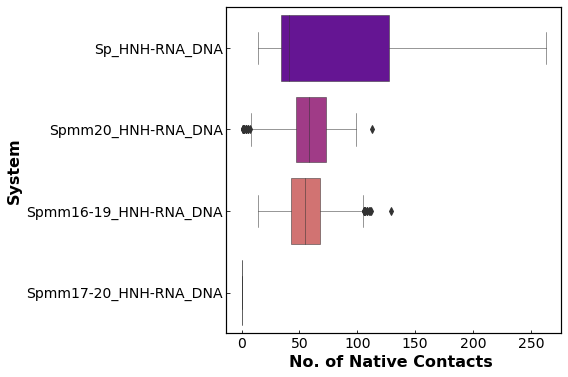

In [28]:
ax=sns.boxplot(data=native[['Sp_HNH-RNA_DNA','Spmm20_HNH-RNA_DNA','Spmm16-19_HNH-RNA_DNA','Spmm17-20_HNH-RNA_DNA']],palette="plasma",linewidth=0.5,orient="h")
plt.xlabel('No. of Native Contacts ', fontsize=16, fontweight='bold')
plt.ylabel('System', fontsize=16, fontweight='bold')
#plt.legend(fontsize=12)
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.gcf().set_size_inches(6, 6)
plt.savefig('figures/Sp_all_stable-part_HNH-hybrid-conts-boxplot.svg')
plt.show()

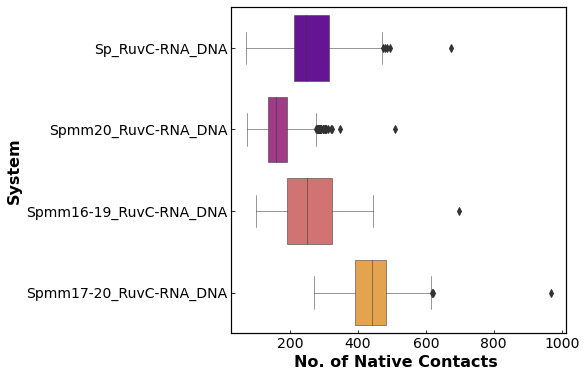

In [29]:
ax=sns.boxplot(data=native[['Sp_RuvC-RNA_DNA','Spmm20_RuvC-RNA_DNA','Spmm16-19_RuvC-RNA_DNA','Spmm17-20_RuvC-RNA_DNA']],palette="plasma",linewidth=0.5,orient="h")
plt.xlabel('No. of Native Contacts ', fontsize=16, fontweight='bold')
plt.ylabel('System', fontsize=16, fontweight='bold')
#plt.legend(fontsize=12)
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.gcf().set_size_inches(6, 6)
plt.savefig('figures/Sp_all_stable-part_RuvC-hybrid-conts-boxplot.svg')
plt.show()

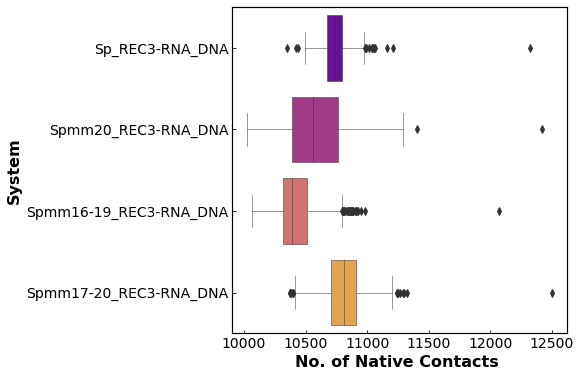

In [31]:
ax=sns.boxplot(data=native[['Sp_REC3-RNA_DNA','Spmm20_REC3-RNA_DNA','Spmm16-19_REC3-RNA_DNA','Spmm17-20_REC3-RNA_DNA']],palette="plasma",linewidth=0.5,orient="h")
plt.xlabel('No. of Native Contacts ', fontsize=16, fontweight='bold')
plt.ylabel('System', fontsize=16, fontweight='bold')
#plt.legend(fontsize=12)
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.gcf().set_size_inches(6, 6)
plt.savefig('figures/Sp_all_stable-part_REc3-hybrid-conts-boxplot.svg')
plt.show()

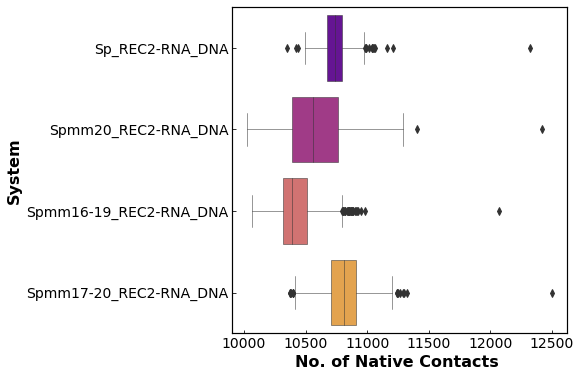

In [32]:
ax=sns.boxplot(data=native[['Sp_REC2-RNA_DNA','Spmm20_REC2-RNA_DNA','Spmm16-19_REC2-RNA_DNA','Spmm17-20_REC2-RNA_DNA']],palette="plasma",linewidth=0.5,orient="h")
plt.xlabel('No. of Native Contacts ', fontsize=16, fontweight='bold')
plt.ylabel('System', fontsize=16, fontweight='bold')
#plt.legend(fontsize=12)
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.gcf().set_size_inches(6, 6)
plt.savefig('figures/Sp_all_stable-part_REC2-hybrid-conts-boxplot.svg')
plt.show()

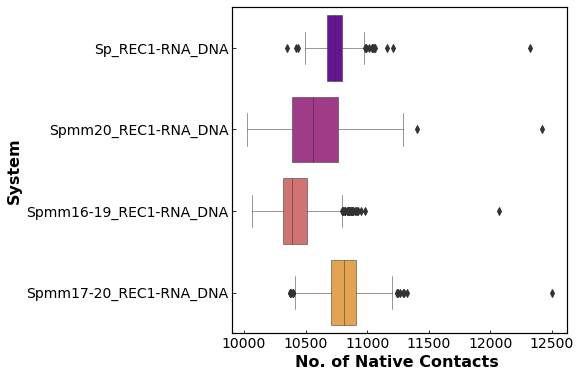

In [33]:
ax=sns.boxplot(data=native[['Sp_REC1-RNA_DNA','Spmm20_REC1-RNA_DNA','Spmm16-19_REC1-RNA_DNA','Spmm17-20_REC1-RNA_DNA']],palette="plasma",linewidth=0.5,orient="h")
plt.xlabel('No. of Native Contacts ', fontsize=16, fontweight='bold')
plt.ylabel('System', fontsize=16, fontweight='bold')
#plt.legend(fontsize=12)
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.gcf().set_size_inches(6, 6)
plt.savefig('figures/Sp_all_stable-part_REC1-hybrid-conts-boxplot.svg')
plt.show()

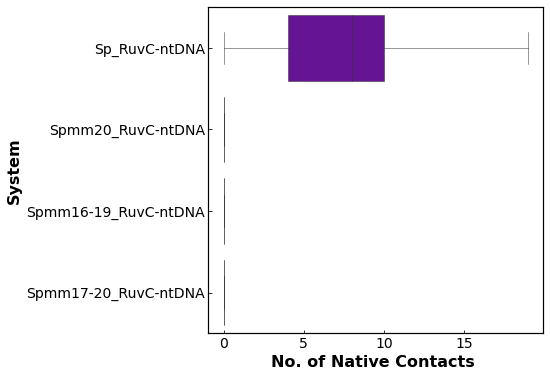

In [34]:
ax=sns.boxplot(data=native[['Sp_RuvC-ntDNA','Spmm20_RuvC-ntDNA','Spmm16-19_RuvC-ntDNA','Spmm17-20_RuvC-ntDNA']],palette="plasma",linewidth=0.5,orient="h")
plt.xlabel('No. of Native Contacts ', fontsize=16, fontweight='bold')
plt.ylabel('System', fontsize=16, fontweight='bold')
#plt.legend(fontsize=12)
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.gcf().set_size_inches(6, 6)
plt.savefig('figures/Sp_all_stable-part_RuvC-ntdna-conts-boxplot.svg')
plt.show()

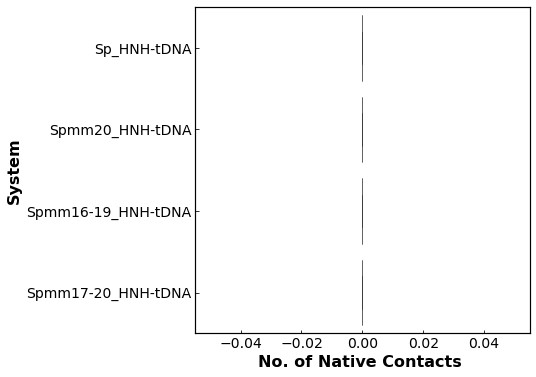

In [35]:
ax=sns.boxplot(data=native[['Sp_HNH-tDNA','Spmm20_HNH-tDNA','Spmm16-19_HNH-tDNA','Spmm17-20_HNH-tDNA']],palette="plasma",linewidth=0.5,orient="h")
plt.xlabel('No. of Native Contacts ', fontsize=16, fontweight='bold')
plt.ylabel('System', fontsize=16, fontweight='bold')
#plt.legend(fontsize=12)
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.gcf().set_size_inches(6, 6)
plt.savefig('figures/Sp_all_stable-part_HNH-tdna-conts-boxplot.svg')
plt.show()

In [1]:
ax=sns.boxplot(data=native[['Sp_ntDNA-tDNA','Spmm20_ntDNA-tDNA','Spmm16-19_ntDNA-tDNA','Spmm17-20_ntDNA-tDNA']],palette="plasma",linewidth=0.5,orient="h")
plt.xlabel('No. of Native Contacts ', fontsize=16, fontweight='bold')
plt.ylabel('System', fontsize=16, fontweight='bold')
#plt.legend(fontsize=12)
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
# plt.gcf().set_size_inches(6, 6)
# plt.savefig('figures/Sp_all_stable-part_ntdna-tdna-conts-boxplot.svg')
# plt.show()

In [14]:
sp_sgrna_tdna=native[['Sp_sgRNA-tDNA','Spmm20_sgRNA-tDNA','Spmm16-19_sgRNA-tDNA','Spmm17-20_sgRNA-tDNA']]
sp_sgrna_tdna.columns=['Sp_native','Sp_mm20','Sp_mm16_19','Sp_mm17-20']
sp_sgrna_tdna_save=sp_sgrna_tdna.stack().reset_index().sort_values(by=['level_1'], ascending=False).iloc[:,1:]
sp_sgrna_tdna_save.columns=['Label','sgRNA-tDNA cont']
sp_sgrna_tdna_save.to_csv('native_non-native_conts/SpCas9_all-sgRNA-tDNA_conts.csv', index=False)
sp_sgrna_tdna_save.head()

,Label,sgRNA-tDNA cont
0,Sp_native,836.0
1208,Sp_native,531.0
2996,Sp_native,488.0
1224,Sp_native,450.0
3000,Sp_native,452.0


In [9]:
import pandas as pd

nat_fn=pd.read_csv('native_contacts_fn_nat.csv')
nat_fnmm20=pd.read_csv('native_contacts_fn_mm20.csv')
nat_fnmm16_19=pd.read_csv('native_contacts_fn_mm16-19.csv')
nat_fnmm17_20=pd.read_csv('native_contacts_fn_mm17-20.csv')

In [10]:
nat_sp=native[['Sp_sgRNA-tDNA','Spmm20_sgRNA-tDNA','Spmm16-19_sgRNA-tDNA','Spmm17-20_sgRNA-tDNA']]

In [11]:
#print(nat_sp.columns, nat_spmm20.columns)
native_fn=pd.concat([nat_fn,nat_fnmm20,nat_fnmm16_19,nat_fnmm17_20], axis=1)
nat_fn2=native_fn[['fn_sgRNA-tDNA','fnmm20_sgRNA-tDNA','fnmm16_19_sgRNA-tDNA','fnmm17-20_sgRNA-tDNA']]
df3=pd.concat([nat_fn2,nat_sp],axis=1)
df3.columns

Index(['fn_sgRNA-tDNA', 'fnmm20_sgRNA-tDNA', 'fnmm16_19_sgRNA-tDNA',
       'fnmm17-20_sgRNA-tDNA', 'Sp_sgRNA-tDNA', 'Spmm20_sgRNA-tDNA',
       'Spmm16-19_sgRNA-tDNA', 'Spmm17-20_sgRNA-tDNA'],
      dtype='object')

In [12]:
df3.head()

,fn_sgRNA-tDNA,fnmm20_sgRNA-tDNA,fnmm16_19_sgRNA-tDNA,fnmm17-20_sgRNA-tDNA,Sp_sgRNA-tDNA,Spmm20_sgRNA-tDNA,Spmm16-19_sgRNA-tDNA,Spmm17-20_sgRNA-tDNA
0,951,809,799.0,892,836.0,845,721,816
1,826,678,642.0,696,632.0,600,536,637
2,779,688,618.0,689,636.0,609,494,644
3,780,686,626.0,693,601.0,659,494,617
4,789,648,613.0,701,529.0,550,477,576


In [13]:
mm16_19_angle=df3[['Spmm16-19_sgRNA-tDNA','fnmm16_19_sgRNA-tDNA']]

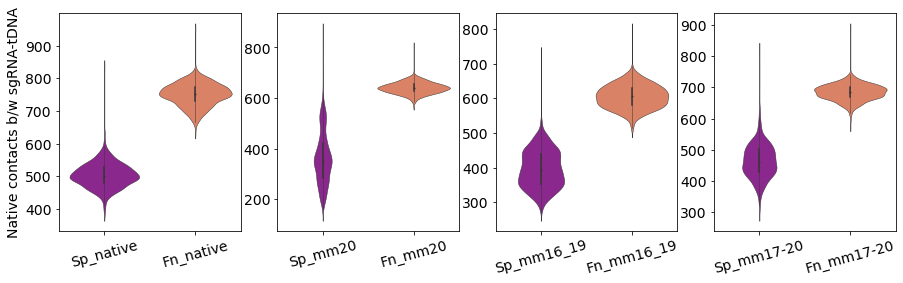

In [20]:
plt.figure(figsize=(15,4))
plt.subplot(1,4,1)
color_dict=['#0d0887','#9c179e','#ed7953','#fdb42f'] # SPCas9

nat_angle=df3[['Sp_sgRNA-tDNA','fn_sgRNA-tDNA']]
ax1=sns.violinplot(data=nat_angle,palette="plasma",linewidth=0.5)
ax1.set_xticklabels(['Sp_native','Fn_native'])
plt.xticks(rotation=15)
plt.ylabel('Native contacts b/w sgRNA-tDNA',fontsize=14)

plt.subplot(1,4,2)
mm20_angle=df3[['Spmm20_sgRNA-tDNA','fnmm20_sgRNA-tDNA']]
ax2=sns.violinplot(data=mm20_angle,palette="plasma",linewidth=0.5)
ax2.set_xticklabels(['Sp_mm20','Fn_mm20'])
plt.xticks(rotation=15)

plt.subplot(1,4,3)
mm16_19_angle=df3[['Spmm16-19_sgRNA-tDNA','fnmm16_19_sgRNA-tDNA']]
ax3=sns.violinplot(data=mm16_19_angle,palette="plasma",linewidth=0.5)
ax3.set_xticklabels(['Sp_mm16_19','Fn_mm16_19'])
plt.xticks(rotation=15)

plt.subplot(1,4,4)
mm17_20_angle=df3[['Spmm17-20_sgRNA-tDNA','fnmm17-20_sgRNA-tDNA']]
mm17_20_angle_save=mm17_20_angle.stack().reset_index().sort_values(by=['level_1'], ascending=False).iloc[:,1:]
mm17_20_angle_save.columns=['Label','Angle']
mm17_20_angle_save.head()
ax4=sns.violinplot(data=mm17_20_angle,palette="plasma",linewidth=0.5)
ax4.set_xticklabels(['Sp_mm17-20','Fn_mm17-20'])
plt.xticks(rotation=15)
plt.savefig('figures/Fn_SpCas9_pairwise_native_conts.svg')
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)

In [43]:
df3.head()

,fn_sgRNA-tDNA,fnmm20_sgRNA-tDNA,fnmm16_19_sgRNA-tDNA,fnmm17-20_sgRNA-tDNA,Sp_sgRNA-tDNA,Spmm20_sgRNA-tDNA,Spmm16-19_sgRNA-tDNA,Spmm17-20_sgRNA-tDNA
0,951,809,799.0,892,836.0,845,721,816
1,826,678,642.0,696,632.0,600,536,637
2,779,688,618.0,689,636.0,609,494,644
3,780,686,626.0,693,601.0,659,494,617
4,789,648,613.0,701,529.0,550,477,576


In [14]:
#Calculate diff value distribution
sp_mm20=[]
sp_mm16_19=[]
sp_mm17_20=[]
fn_mm20=[]
fn_mm16_19=[]
fn_mm17_20=[]
fn_mm20=df3.iloc[:,0]-df3.iloc[:,1]
fn_mm16_19=df3.iloc[:,0]-df3.iloc[:,2]
fn_mm17_20=df3.iloc[:,0]-df3.iloc[:,3]
sp_mm20=df3.iloc[:,4]-df3.iloc[:,5]
sp_mm16_19=df3.iloc[:,4]-df3.iloc[:,6]
sp_mm17_20=df3.iloc[:,4]-df3.iloc[:,7]

df4=pd.DataFrame(list(zip(sp_mm20,sp_mm16_19,sp_mm17_20,fn_mm20,fn_mm16_19,fn_mm17_20)), columns=['Sp_nat-mm20','Sp_nat-mm16_19','Sp_nat-mm17-20','Fn_nat-mm20','Fn_nat-mm16_19','Fn_nat-mm17-20'])
df4.head()

,Sp_nat-mm20,Sp_nat-mm16_19,Sp_nat-mm17-20,Fn_nat-mm20,Fn_nat-mm16_19,Fn_nat-mm17-20
0,-9.0,115.0,20.0,142,152.0,59
1,32.0,96.0,-5.0,148,184.0,130
2,27.0,142.0,-8.0,91,161.0,90
3,-58.0,107.0,-16.0,94,154.0,87
4,-21.0,52.0,-47.0,141,176.0,88


In [46]:
df4.head()

,Sp_nat-mm20,Sp_nat-mm16_19,Sp_nat-mm17-20,Fn_nat-mm20,Fn_nat-mm16_19,Fn_nat-mm17-20
0,-9.0,115.0,20.0,142,152.0,59
1,32.0,96.0,-5.0,148,184.0,130
2,27.0,142.0,-8.0,91,161.0,90
3,-58.0,107.0,-16.0,94,154.0,87
4,-21.0,52.0,-47.0,141,176.0,88


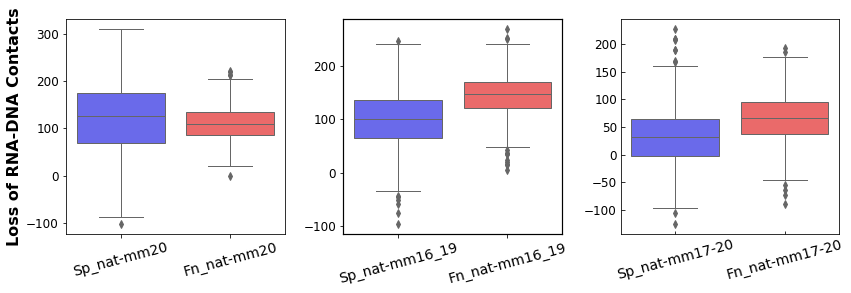

In [51]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
color_dict=['#0d0887','#9c179e','#ed7953','#fdb42f'] # SPCas9

nat_angle=df4[['Sp_nat-mm20','Fn_nat-mm20']]
ax1=sns.boxplot(data=nat_angle,palette="seismic",linewidth=1)
ax1.set_xticklabels(['Sp_nat-mm20','Fn_nat-mm20'])
plt.xticks(rotation=15, fontsize=14)
plt.ylabel('Loss of RNA-DNA Contacts',fontsize=16, fontweight='bold')

plt.subplot(1,3,2)
mm20_angle=df4[['Sp_nat-mm16_19','Fn_nat-mm16_19']]
ax2=sns.boxplot(data=mm20_angle,palette="seismic",linewidth=1)
ax2.set_xticklabels(['Sp_nat-mm16_19','Fn_nat-mm16_19'])
plt.xticks(rotation=15, fontsize=14)
plt.subplot(1,3,3)
mm16_19_angle=df4[['Sp_nat-mm17-20','Fn_nat-mm17-20']]
ax3=sns.boxplot(data=mm16_19_angle,palette="seismic",linewidth=1)
ax3.set_xticklabels(['Sp_nat-mm17-20','Fn_nat-mm17-20'])
plt.xticks(rotation=15, fontsize=14)
#plt.savefig('../figures/Fn_SpCas9_pairwise_native_conts.svg')
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)


#plt.xlabel('RMSD', fontsize=16, fontweight='bold')
ax2.spines['left'].set_linewidth(1.2)
ax2.spines['bottom'].set_linewidth(1.2)
ax2.spines['top'].set_linewidth(1.2)
ax2.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=15, fontsize=14)
plt.yticks(fontsize=12)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.tight_layout()

plt.savefig('figures/Sp-Fn-loss_bps_boxplot.svg')
plt.show()

In [238]:
df3.mean()

fn_sgRNA-tDNA           633.45200
fnmm20_sgRNA-tDNA       612.63000
fnmm16_19_sgRNA-tDNA    600.47992
fnmm17-20_sgRNA-tDNA    593.22600
Sp_sgRNA-tDNA           505.18200
Spmm20_sgRNA-tDNA       475.79800
Spmm16-19_sgRNA-tDNA    455.91400
Spmm17-20_sgRNA-tDNA    516.29800
dtype: float64

In [239]:
df3.median()

fn_sgRNA-tDNA           636.0
fnmm20_sgRNA-tDNA       608.0
fnmm16_19_sgRNA-tDNA    599.0
fnmm17-20_sgRNA-tDNA    590.0
Sp_sgRNA-tDNA           507.0
Spmm20_sgRNA-tDNA       478.0
Spmm16-19_sgRNA-tDNA    466.0
Spmm17-20_sgRNA-tDNA    516.0
dtype: float64

In [241]:
sp_cont=nat_sp.stack().reset_index().sort_values(by=['level_1'], ascending=False).iloc[:,1:]
sp_cont.columns=['Label','contacts']
sp_cont.head()

,Label,contacts
1181,Spmm20_sgRNA-tDNA,513
1109,Spmm20_sgRNA-tDNA,488
1105,Spmm20_sgRNA-tDNA,551
1101,Spmm20_sgRNA-tDNA,473
453,Spmm20_sgRNA-tDNA,470


In [242]:
fn_cont=nat_fn2.stack().reset_index().sort_values(by=['level_1'], ascending=False).iloc[:,1:]
fn_cont.columns=['Label','contacts']
#fn_sp_cont.to_csv('LIE-Sp-all.csv', index=False)
fn_cont.head()

,Label,contacts
1401,fnmm20_sgRNA-tDNA,607.0
661,fnmm20_sgRNA-tDNA,628.0
1017,fnmm20_sgRNA-tDNA,636.0
381,fnmm20_sgRNA-tDNA,617.0
1429,fnmm20_sgRNA-tDNA,625.0


In [243]:
for label1 in list(sp_cont['Label'].unique()):
    for label2 in list(fn_cont['Label'].unique()):
        a = list(sp_cont[sp_cont['Label']==label1]['contacts'])
        b = list(fn_cont[fn_cont['Label']==label2]['contacts'])
        print(f'for {label1} and {label2} pvalue=',stats.ttest_ind(a, b, equal_var=False)[1])
        #print(f'for {label1} and {label2} pvalue=',mannwhitneyu(a,b)[1])
        #if mannwhitneyu(a,b)[1] > 0.05:
        if stats.ttest_ind(a, b, equal_var=False)[1] > 0.05:
            print('#######################################') 
            print('do not reject null hypothesis', label1, label2, 'have similar distribtution')
            print('#######################################') 
#         else:
#             print('Rejecting null hypothesis, have a different distribution')

for Spmm20_sgRNA-tDNA and fnmm20_sgRNA-tDNA pvalue= 2.638364943044602e-264
for Spmm20_sgRNA-tDNA and fnmm17-20_sgRNA-tDNA pvalue= 2.896944344268018e-226
for Spmm20_sgRNA-tDNA and fnmm16_19_sgRNA-tDNA pvalue= 4.1638451747079514e-222
for Spmm20_sgRNA-tDNA and fn_sgRNA-tDNA pvalue= 1.3471468284e-314
for Spmm17-20_sgRNA-tDNA and fnmm20_sgRNA-tDNA pvalue= 3.443839974972392e-145
for Spmm17-20_sgRNA-tDNA and fnmm17-20_sgRNA-tDNA pvalue= 1.7035499886976227e-107
for Spmm17-20_sgRNA-tDNA and fnmm16_19_sgRNA-tDNA pvalue= 3.392570689896392e-112
for Spmm17-20_sgRNA-tDNA and fn_sgRNA-tDNA pvalue= 3.716258010973123e-194
for Spmm16-19_sgRNA-tDNA and fnmm20_sgRNA-tDNA pvalue= 2.5863971445813204e-183
for Spmm16-19_sgRNA-tDNA and fnmm17-20_sgRNA-tDNA pvalue= 1.9671731442104235e-156
for Spmm16-19_sgRNA-tDNA and fnmm16_19_sgRNA-tDNA pvalue= 1.2907730739871548e-164
for Spmm16-19_sgRNA-tDNA and fn_sgRNA-tDNA pvalue= 1.715716394623189e-207
for Sp_sgRNA-tDNA and fnmm20_sgRNA-tDNA pvalue= 2.0731754825629352e-20

In [244]:
for label1 in list(sp_cont['Label'].unique()):
    a = list(sp_cont[sp_cont['Label']=='Sp_sgRNA-tDNA']['contacts'])
    b=list(sp_cont[sp_cont['Label']==label1]['contacts'])
    print(label1)
    print(f'pvalue=',stats.ttest_ind(a, b, equal_var=False)[1])
    if stats.ttest_ind(a, b, equal_var=False)[1] > 0.05:
        print('#######################################') 
        print('do not reject null hypothesis', label1, 'Sp_native have similar distribtution')
    else:
        print('Reject null hypothesis', label1, 'Sp_native have a different distribution') 

Spmm20_sgRNA-tDNA
pvalue= 2.0716960433834824e-21
Reject null hypothesis Spmm20_sgRNA-tDNA Sp_native have a different distribution
Spmm17-20_sgRNA-tDNA
pvalue= 0.0007875765487545618
Reject null hypothesis Spmm17-20_sgRNA-tDNA Sp_native have a different distribution
Spmm16-19_sgRNA-tDNA
pvalue= 3.22138351871994e-30
Reject null hypothesis Spmm16-19_sgRNA-tDNA Sp_native have a different distribution
Sp_sgRNA-tDNA
pvalue= 1.0
#######################################
do not reject null hypothesis Sp_sgRNA-tDNA Sp_native have similar distribtution


In [245]:
for label1 in list(fn_cont['Label'].unique()):
    a = list(fn_cont[fn_cont['Label']=='fn_sgRNA-tDNA']['contacts'])
    b=list(fn_cont[fn_cont['Label']==label1]['contacts'])
    print(label1)
    print(f'pvalue=',stats.ttest_ind(a, b, equal_var=False)[1])
    if stats.ttest_ind(a, b, equal_var=False)[1] > 0.05:
        print('#######################################') 
        print('do not reject null hypothesis', label1, 'fn_native have similar distribtution')
    else:
        print('Reject null hypothesis', label1, 'fn_native have a different distribution') 

fnmm20_sgRNA-tDNA
pvalue= 1.472920711864196e-20
Reject null hypothesis fnmm20_sgRNA-tDNA fn_native have a different distribution
fnmm17-20_sgRNA-tDNA
pvalue= 8.908443056928975e-71
Reject null hypothesis fnmm17-20_sgRNA-tDNA fn_native have a different distribution
fnmm16_19_sgRNA-tDNA
pvalue= 2.609548530553091e-38
Reject null hypothesis fnmm16_19_sgRNA-tDNA fn_native have a different distribution
fn_sgRNA-tDNA
pvalue= 1.0
#######################################
do not reject null hypothesis fn_sgRNA-tDNA fn_native have similar distribtution


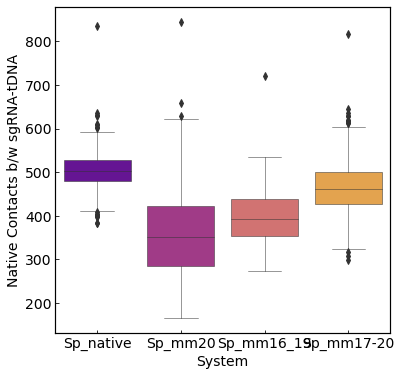

In [18]:
colors=['#440154','#31688e','#21918c','#90d743']
sp_cont=native[['Sp_sgRNA-tDNA','Spmm20_sgRNA-tDNA','Spmm16-19_sgRNA-tDNA','Spmm17-20_sgRNA-tDNA']]
sp_cont_save=sp_cont.stack().reset_index().sort_values(by=['level_1'], ascending=False).iloc[:,1:]
sp_cont_save.columns=['Label','Angle']
#sp_cont_save.head()

sp_cont.columns=['Sp_native','Sp_mm20','Sp_mm16_19','Sp_mm17-20']
ax1=sns.boxplot(data=sp_cont,palette="plasma",linewidth=0.5)
plt.xticks(rotation=15)
plt.xlabel('Systems',fontsize=14)
plt.ylabel('Angle b/w sgRNA-tDNA-ntDNA',fontsize=14)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
#plt.savefig('../figures/SpCas9_all_lie_angle.svg'
plt.ylabel('Native Contacts b/w sgRNA-tDNA', fontsize=14)
plt.xlabel('System',fontsize=14)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.gcf().set_size_inches(5, 4)
ax1.spines['left'].set_linewidth(1.2)
ax1.spines['bottom'].set_linewidth(1.2)
ax1.spines['top'].set_linewidth(1.2)
ax1.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.gcf().set_size_inches(6, 6)
plt.savefig('figures/Sp_all_stable-part_sgRNA-tdna-conts-boxplot.svg')
plt.show()

In [106]:
sp_sgrna_tdna=native[['Sp_sgRNA-tDNA','Spmm20_sgRNA-tDNA','Spmm16-19_sgRNA-tDNA','Spmm17-20_sgRNA-tDNA']]
sp_sgrna_tdna.columns=['Sp_native','Sp_mm20','Sp_mm16_19','Sp_mm17-20']
sp_sgrna_tdna_save=sp_sgrna_tdna.stack().reset_index().sort_values(by=['level_1'], ascending=False).iloc[:,1:]
sp_sgrna_tdna_save.columns=['Label','sgRNA-tDNA cont']
sp_sgrna_tdna_save.to_csv('SpCas9-FnCas9_all-sgRNA-tDNA_conts.csv', index=False)
sp_sgrna_tdna_save.head()

,Label,sgRNA-tDNA cont
0,Sp_native,836.0
1208,Sp_native,531.0
2996,Sp_native,488.0
1224,Sp_native,450.0
3000,Sp_native,452.0


In [110]:
native.columns

Index(['Sp_RuvC-ntDNA', 'Sp_HNH-tDNA', 'Sp_ntDNA-tDNA', 'Sp_sgRNA-tDNA',
       'Sp_RNA_DNA-L2', 'Sp_REC3-RNA_DNA', 'Sp_RuvC-RNA_DNA', 'Sp_HNH-RNA_DNA',
       'Sp_RNA_DNA-L1', 'Spmm20_RuvC-ntDNA', 'Spmm20_HNH-tDNA',
       'Spmm20_ntDNA-tDNA', 'Spmm20_sgRNA-tDNA', 'Spmm20_RNA_DNA-L2',
       'Spmm20_REC3-RNA_DNA', 'Spmm20_RuvC-RNA_DNA', 'Spmm20_HNH-RNA_DNA',
       'Spmm20_RNA_DNA-L1', 'Spmm16-19_RuvC-ntDNA', 'Spmm16-19_HNH-tDNA',
       'Spmm16-19_ntDNA-tDNA', 'Spmm16-19_sgRNA-tDNA', 'Spmm16-19_RNA_DNA-L2',
       'Spmm16-19_REC3-RNA_DNA', 'Spmm16-19_RuvC-RNA_DNA',
       'Spmm16-19_HNH-RNA_DNA', 'Spmm16-19_RNA_DNA-L1', 'Spmm17-20_RuvC-ntDNA',
       'Spmm17-20_HNH-tDNA', 'Spmm17-20_ntDNA-tDNA', 'Spmm17-20_sgRNA-tDNA',
       'Spmm17-20_RNA_DNA-L2', 'Spmm17-20_REC3-RNA_DNA',
       'Spmm17-20_RuvC-RNA_DNA', 'Spmm17-20_HNH-RNA_DNA',
       'Spmm17-20_RNA_DNA-L1'],
      dtype='object')

In [3]:
sp1_ruvc=pd.read_csv('sp_nodt_files/ruvc-hyrbid-count_nodt_500ns_spnat_nodt_spnat.csv').reset_index(drop=True)
sp2_ruvc=pd.read_csv('sp_nodt_files/ruvc-hyrbid-count_spmm20_nodt_nodt_spmm20.csv').reset_index(drop=True)
sp3_ruvc=pd.read_csv('sp_nodt_files/ruvc-hyrbid-count_nodt_500ns_spmm16_19_nodt_spmm16_19.csv').reset_index(drop=True)
sp4_ruvc=pd.read_csv('sp_nodt_files/ruvc-hyrbid-count_nodt_500ns_spmm17-20_nodt_spmm17-20.csv').reset_index(drop=True)

sp1_hnh=pd.read_csv('sp_nodt_files/hnh-hybrid-count_nodt_500ns_spnat_nodt_spnat.csv').reset_index(drop=True)
sp2_hnh=pd.read_csv('sp_nodt_files/hnh-hybrid-count_spmm20_nodt_nodt_spmm20.csv').reset_index(drop=True)
sp3_hnh=pd.read_csv('sp_nodt_files/hnh-hybrid-count_nodt_500ns_spmm16_19_nodt_spmm16_19.csv').reset_index(drop=True)
sp4_hnh=pd.read_csv('sp_nodt_files/hnh-hybrid-count_nodt_500ns_spmm17-20_nodt_spmm17-20.csv').reset_index(drop=True)

sp1_rec1=pd.read_csv('sp_nodt_files/rec1-hybrid-count_nodt_500ns_spnat_nodt_spnat.csv').reset_index(drop=True)
sp2_rec1=pd.read_csv('sp_nodt_files/rec1-hybrid-count_spmm20_nodt_nodt_spmm20.csv').reset_index(drop=True)
sp3_rec1=pd.read_csv('sp_nodt_files/rec1-hybrid-count_nodt_500ns_spmm16_19_nodt_spmm16_19.csv').reset_index(drop=True)
sp4_rec1=pd.read_csv('sp_nodt_files/rec1-hybrid-count_nodt_500ns_spmm17-20_nodt_spmm17-20.csv').reset_index(drop=True)

sp1_rec2=pd.read_csv('sp_nodt_files/rec2-hybrid-count_nodt_500ns_spnat_nodt_spnat.csv').reset_index(drop=True)
sp2_rec2=pd.read_csv('sp_nodt_files/rec2-hybrid-count_spmm20_nodt_nodt_spmm20.csv').reset_index(drop=True)
sp3_rec2=pd.read_csv('sp_nodt_files/rec2-hybrid-count_nodt_500ns_spmm16_19_nodt_spmm16_19.csv').reset_index(drop=True)
sp4_rec2=pd.read_csv('sp_nodt_files/rec2-hybrid-count_nodt_500ns_spmm17-20_nodt_spmm17-20.csv').reset_index(drop=True)

sp1_rec3=pd.read_csv('sp_nodt_files/rec3-hybrid-count_nodt_500ns_spnat_nodt_spnat.csv').reset_index(drop=True)
sp2_rec3=pd.read_csv('sp_nodt_files/rec3-hybrid-count_spmm20_nodt_nodt_spmm20.csv').reset_index(drop=True)
sp3_rec3=pd.read_csv('sp_nodt_files/rec3-hybrid-count_nodt_500ns_spmm16_19_nodt_spmm16_19.csv').reset_index(drop=True)
sp4_rec3=pd.read_csv('sp_nodt_files/rec3-hybrid-count_nodt_500ns_spmm17-20_nodt_spmm17-20.csv').reset_index(drop=True)

sp1_ruvc.columns=['Frame','sp-native-ruvc','sp-non-native-ruvc']
sp2_ruvc.columns=['Frame','sp-mm20-ruvc','sp-mm20-non-native-ruvc']
sp3_ruvc.columns=['Frame','sp-mm16_19-ruvc','sp-mm16_19-non-native-ruvc']
sp4_ruvc.columns=['Frame','sp-mm17-20-ruvc','sp-mm17-20-non-native-ruvc']

sp1_hnh.columns=['Frame','sp-native-hnh','sp-non-native-hnh']
sp2_hnh.columns=['Frame','sp-mm20-hnh','sp-mm20-non-native-hnh']
sp3_hnh.columns=['Frame','sp-mm16_19-hnh','sp-mm16_19-non-native-hnh']
sp4_hnh.columns=['Frame','sp-mm17-20-hnh','sp-mm17-20-non-native-hnh']



sp1_rec1.columns=['Frame','sp-native-rec1','sp-non-native-rec1']
sp2_rec1.columns=['Frame','sp-mm20-rec1','sp-mm20-non-native-rec1']
sp3_rec1.columns=['Frame','sp-mm16_19-rec1','sp-mm16_19-non-native-rec1']
sp4_rec1.columns=['Frame','sp-mm17-20-rec1','sp-mm17-20-non-native-rec1']



sp1_rec3.columns=['Frame','sp-native-rec3','sp-non-native-rec3']
sp2_rec3.columns=['Frame','sp-mm20-rec3','sp-mm20-non-native-rec3']
sp3_rec3.columns=['Frame','sp-mm16_19-rec3','sp-mm16_19-non-native-rec3']
sp4_rec3.columns=['Frame','sp-mm17-20-rec3','sp-mm17-20-non-native-rec3']



sp1_rec2.columns=['Frame','sp-native-rec2','sp-non-native-rec2']
sp2_rec2.columns=['Frame','sp-mm20-rec2','sp-mm20-non-native-rec2']
sp3_rec2.columns=['Frame','sp-mm16_19-rec2','sp-mm16_19-non-native-rec2']
sp4_rec2.columns=['Frame','sp-mm17-20-rec2','sp-mm17-20-non-native-rec2']


sp1_rec3.columns=['Frame','sp-native-rec3','sp-non-native-rec3']
sp2_rec3.columns=['Frame','sp-mm20-rec3','sp-mm20-non-native-rec3']
sp3_rec3.columns=['Frame','sp-mm16_19-rec3','sp-mm16_19-non-native-rec3']
sp4_rec3.columns=['Frame','sp-mm17-20-rec3','sp-mm17-20-non-native-rec3']

In [4]:
rec1=sp1_rec1.merge(sp2_rec1, on = 'Frame', how="inner").merge(sp3_rec1, on = 'Frame', how="inner").merge(sp4_rec1, on = 'Frame', how="inner")
rec2=sp1_rec2.merge(sp2_rec2, on = 'Frame', how="inner").merge(sp3_rec2, on = 'Frame', how="inner").merge(sp4_rec2, on = 'Frame', how="inner")
rec3=sp1_rec3.merge(sp2_rec3, on = 'Frame', how="inner").merge(sp3_rec3, on = 'Frame', how="inner").merge(sp4_rec3, on = 'Frame', how="inner")
ruvc=sp1_ruvc.merge(sp2_ruvc, on = 'Frame', how="inner").merge(sp3_ruvc, on = 'Frame', how="inner").merge(sp4_ruvc, on = 'Frame', how="inner")
hnh=sp1_hnh.merge(sp2_hnh, on = 'Frame', how="inner").merge(sp3_hnh, on = 'Frame', how="inner").merge(sp4_hnh, on = 'Frame', how="inner")

In [19]:
ruvc=ruvc.iloc[40000:45000,:]
hnh=hnh.iloc[40000:45000,:]
rec1=rec1.iloc[40000:45000,:]
rec2=rec2.iloc[40000:45000,:]
rec3=rec3.iloc[40000:45000,:]

In [5]:
!mkdir figures/native-sp

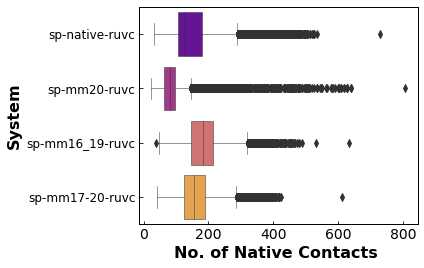

In [34]:
sns.boxplot(data=ruvc[['sp-native-ruvc','sp-mm20-ruvc','sp-mm16_19-ruvc','sp-mm17-20-ruvc']],palette="plasma",linewidth=0.5,orient="h")
#plt.legend(['Sp-native','Sp_mm20','Sp_mm16_19','Sp_mm17-20'],fontsize=12)
# ruvc[['sp-native-ruvc','sp-mm20-ruvc','sp-mm16_19-ruvc','sp-mm17-20-ruvc']].rename
# li=['Sp-native','Sp_mm20','Sp_mm16_19','Sp_mm17-20']
#plt.xlabel('PC1',fontsize=16, fontweight='bold')
plt.xlabel('No. of Native Contacts ', fontsize=16, fontweight='bold')
plt.ylabel('System', fontsize=16, fontweight='bold')
ax = plt.gca()
plt.gcf().set_size_inches(5,4)
ax.spines['left'].set_linewidth(1.0)
ax.spines['bottom'].set_linewidth(1.0)
ax.spines['top'].set_linewidth(1.0)
ax.spines['right'].set_linewidth(1.0)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.savefig('figures/native-sp/SpCas9_all_ruvc_native-conts.svg')
#plt.title('PCA of SpCas9 HNH')


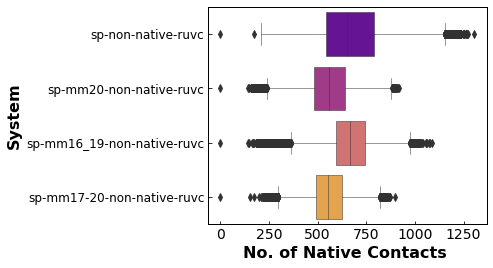

In [35]:
sns.boxplot(data=ruvc[['sp-non-native-ruvc','sp-mm20-non-native-ruvc','sp-mm16_19-non-native-ruvc','sp-mm17-20-non-native-ruvc']],palette="plasma",linewidth=0.5,orient="h")
ax = plt.gca()
plt.xlabel('No. of Native Contacts ', fontsize=16, fontweight='bold')
plt.ylabel('System', fontsize=16, fontweight='bold')
ax.spines['left'].set_linewidth(1.0)
ax.spines['bottom'].set_linewidth(1.0)
ax.spines['top'].set_linewidth(1.0)
ax.spines['right'].set_linewidth(1.0)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.savefig('figures/native-sp/SpCas9_all_ruvc_non-native-conts.svg')
#plt.title('PCA of SpCas9 HNH')
plt.gcf().set_size_inches(5,4)

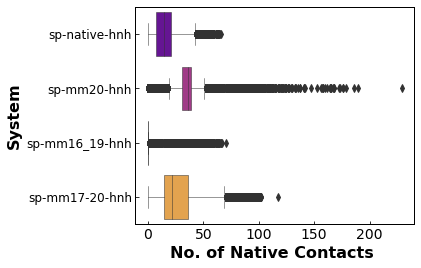

In [36]:
sns.boxplot(data=hnh[['sp-native-hnh','sp-mm20-hnh','sp-mm16_19-hnh','sp-mm17-20-hnh']],palette="plasma",linewidth=0.5,orient="h")
ax = plt.gca()
plt.xlabel('No. of Native Contacts ', fontsize=16, fontweight='bold')
plt.ylabel('System', fontsize=16, fontweight='bold')
ax.spines['left'].set_linewidth(1.0)
ax.spines['bottom'].set_linewidth(1.0)
ax.spines['top'].set_linewidth(1.0)
ax.spines['right'].set_linewidth(1.0)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.savefig('figures/native-sp/SpCas9_all_hnh_native-conts.svg')
#plt.title('PCA of SpCas9 HNH')
plt.gcf().set_size_inches(5,4)

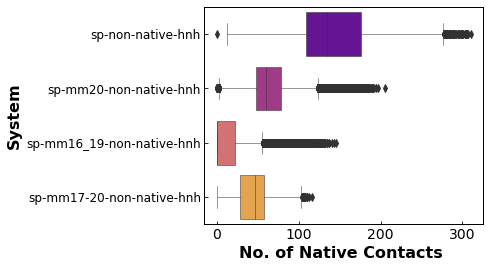

In [37]:
sns.boxplot(data=hnh[['sp-non-native-hnh','sp-mm20-non-native-hnh','sp-mm16_19-non-native-hnh','sp-mm17-20-non-native-hnh']],palette="plasma",linewidth=0.5,orient="h")
ax = plt.gca()
plt.xlabel('No. of Native Contacts ', fontsize=16, fontweight='bold')
plt.ylabel('System', fontsize=16, fontweight='bold')
ax.spines['left'].set_linewidth(1.0)
ax.spines['bottom'].set_linewidth(1.0)
ax.spines['top'].set_linewidth(1.0)
ax.spines['right'].set_linewidth(1.0)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.savefig('figures/native-sp/SpCas9_all_hnh_non-native-conts.svg')
#plt.title('PCA of SpCas9 HNH')
plt.gcf().set_size_inches(5,4)

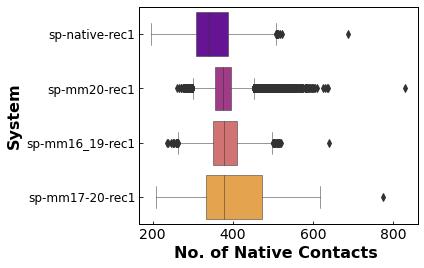

In [38]:
sns.boxplot(data=rec1[['sp-native-rec1','sp-mm20-rec1','sp-mm16_19-rec1','sp-mm17-20-rec1']],palette="plasma",linewidth=0.5,orient="h")
ax = plt.gca()
plt.xlabel('No. of Native Contacts ', fontsize=16, fontweight='bold')
plt.ylabel('System', fontsize=16, fontweight='bold')
ax.spines['left'].set_linewidth(1.0)
ax.spines['bottom'].set_linewidth(1.0)
ax.spines['top'].set_linewidth(1.0)
ax.spines['right'].set_linewidth(1.0)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.savefig('figures/native-sp/SpCas9_all_rec1_native-conts.svg')
#plt.title('PCA of SpCas9 HNH')
plt.gcf().set_size_inches(5,4)

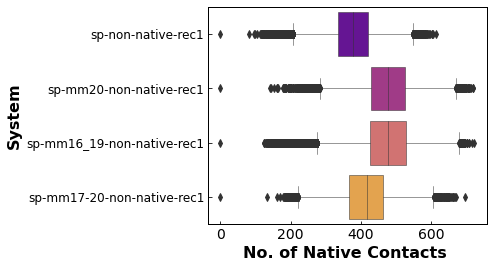

In [39]:
sns.boxplot(data=rec1[['sp-non-native-rec1','sp-mm20-non-native-rec1','sp-mm16_19-non-native-rec1','sp-mm17-20-non-native-rec1']],palette="plasma",linewidth=0.5,orient="h")
ax = plt.gca()
plt.xlabel('No. of Native Contacts ', fontsize=16, fontweight='bold')
plt.ylabel('System', fontsize=16, fontweight='bold')
ax.spines['left'].set_linewidth(1.0)
ax.spines['bottom'].set_linewidth(1.0)
ax.spines['top'].set_linewidth(1.0)
ax.spines['right'].set_linewidth(1.0)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.savefig('figures/native-sp/SpCas9_all_rec1_non-native-conts.svg')
#plt.title('PCA of SpCas9 HNH')
plt.gcf().set_size_inches(5,4)

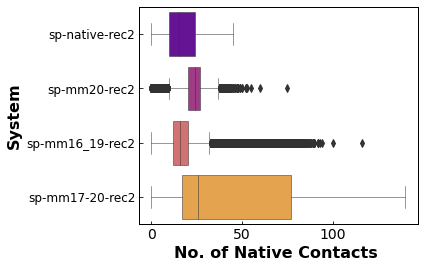

In [40]:
sns.boxplot(data=rec2[['sp-native-rec2','sp-mm20-rec2','sp-mm16_19-rec2','sp-mm17-20-rec2']],palette="plasma",linewidth=0.5,orient="h")
ax = plt.gca()
plt.xlabel('No. of Native Contacts ', fontsize=16, fontweight='bold')
plt.ylabel('System', fontsize=16, fontweight='bold')
ax.spines['left'].set_linewidth(1.0)
ax.spines['bottom'].set_linewidth(1.0)
ax.spines['top'].set_linewidth(1.0)
ax.spines['right'].set_linewidth(1.0)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.savefig('figures/native-sp/SpCas9_all_rec2_native-conts.svg')
#plt.title('PCA of SpCas9 HNH')
plt.gcf().set_size_inches(5,4)

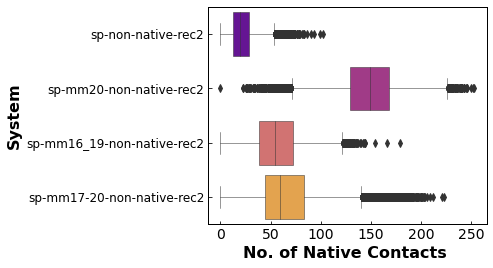

In [41]:
sns.boxplot(data=rec2[['sp-non-native-rec2','sp-mm20-non-native-rec2','sp-mm16_19-non-native-rec2','sp-mm17-20-non-native-rec2']],palette="plasma",linewidth=0.5,orient="h")
ax = plt.gca()
plt.xlabel('No. of Native Contacts ', fontsize=16, fontweight='bold')
plt.ylabel('System', fontsize=16, fontweight='bold')
ax.spines['left'].set_linewidth(1.0)
ax.spines['bottom'].set_linewidth(1.0)
ax.spines['top'].set_linewidth(1.0)
ax.spines['right'].set_linewidth(1.0)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.savefig('figures/native-sp/SpCas9_all_rec2_non-native-conts.svg')
#plt.title('PCA of SpCas9 HNH')
plt.gcf().set_size_inches(5,4)

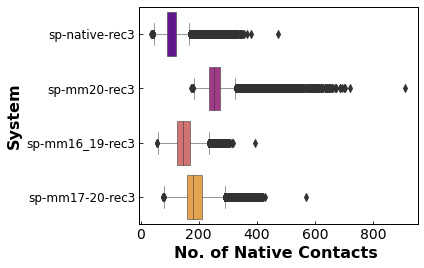

In [42]:
sns.boxplot(data=rec3[['sp-native-rec3','sp-mm20-rec3','sp-mm16_19-rec3','sp-mm17-20-rec3']],palette="plasma",linewidth=0.5,orient="h")
ax = plt.gca()
plt.xlabel('No. of Native Contacts ', fontsize=16, fontweight='bold')
plt.ylabel('System', fontsize=16, fontweight='bold')
ax.spines['left'].set_linewidth(1.0)
ax.spines['bottom'].set_linewidth(1.0)
ax.spines['top'].set_linewidth(1.0)
ax.spines['right'].set_linewidth(1.0)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.savefig('figures/native-sp/SpCas9_all_rec3_native-conts.svg')
#plt.title('PCA of SpCas9 HNH')
plt.gcf().set_size_inches(5,4)

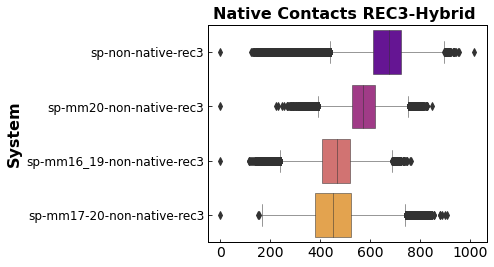

In [45]:
sns.boxplot(data=rec3[['sp-non-native-rec3','sp-mm20-non-native-rec3','sp-mm16_19-non-native-rec3','sp-mm17-20-non-native-rec3']],palette="plasma",linewidth=0.5,orient="h")
ax = plt.gca()
plt.title('Native Contacts REC3-Hybrid ', fontsize=16, fontweight='bold')
plt.ylabel('System', fontsize=16, fontweight='bold')
ax.spines['left'].set_linewidth(1.0)
ax.spines['bottom'].set_linewidth(1.0)
ax.spines['top'].set_linewidth(1.0)
ax.spines['right'].set_linewidth(1.0)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.savefig('figures/native-sp/SpCas9_all_rec3_non-native-conts.svg')
#plt.title('PCA of SpCas9 HNH')
plt.gcf().set_size_inches(5,4)

In [119]:
# COmpare distribtuion of PC1 of all dataframes
import pandas as pd
from scipy.stats import mannwhitneyu
import pandas as pd
from scipy.stats import mannwhitneyu

def mann_whitney_u_test(df1, df2, col_name_1, col_name_2, alpha=0.05):
    # Extract the data as NumPy arrays from the DataFrames
    data1 = df1[col_name_1].values
    data2 = df2[col_name_2].values

    # Perform the Mann-Whitney U test
    statistic, p_value = mannwhitneyu(data1, data2, alternative='two-sided')

    # Determine the significance based on the p-value
    if p_value < alpha:
        significance_msg = 'Reject the null hypothesis: There is a significant difference between the datasets.'
    else:
        significance_msg = 'Fail to reject the null hypothesis: There is no significant difference between the datasets.'

    # Create a dictionary to store the results
    result_dict = {
        'Mann-Whitney U Statistic': statistic,
        'p-value': p_value,
        'Significance Message': significance_msg
    }

    return result_dict

In [120]:
df1=pd.read_csv('Sp_NA_csvs/SP_PCA_PCs_hybrid.csv')
df1['Label'].unique()
nat=df1[df1['Label']=='Sp_native']
mm20=df1[df1['Label']=='Sp_mm20']
mm16_19=df1[df1['Label']=='Sp_mm16_19']
mm17_20=df1[df1['Label']=='Sp_mm17-20']

result1 = mann_whitney_u_test(nat, mm20, 'PC1', 'PC1')
result2 = mann_whitney_u_test(nat, mm16_19, 'PC1', 'PC1')
result3 = mann_whitney_u_test(nat, mm17_20, 'PC1', 'PC1')
result4 = mann_whitney_u_test(mm20, mm16_19, 'PC1', 'PC1')
result5 = mann_whitney_u_test(mm20, mm17_20, 'PC1', 'PC1')
result6 = mann_whitney_u_test(mm16_19, mm17_20, 'PC1', 'PC1')
print("Diff between native and mm20- PC1", result1)
print("Diff between native and mm16_19- PC1", result2)
print("Diff between native and mm17_20- PC1", result3)
print("Diff between mm20 and mm16_19- PC1", result4)
print("Diff between mm20 and mm17_20- PC1", result5)
print("Diff between mm16_19 and mm17_20- PC1", result6)

print("############################################################################################")

result1 = mann_whitney_u_test(nat, mm20, 'PC2', 'PC2')
result2 = mann_whitney_u_test(nat, mm16_19, 'PC2', 'PC2')
result3 = mann_whitney_u_test(nat, mm17_20, 'PC2', 'PC2')
result4 = mann_whitney_u_test(mm20, mm16_19, 'PC2', 'PC2')
result5 = mann_whitney_u_test(mm20, mm17_20, 'PC2', 'PC2')
result6 = mann_whitney_u_test(mm16_19, mm17_20, 'PC2', 'PC2')
print("Diff between native and mm20- PC2", result1)
print("Diff between native and mm16_19- PC2", result2)
print("Diff between native and mm17_20- PC2", result3)
print("Diff between mm20 and mm16_19- PC2", result4)
print("Diff between mm20 and mm17_20- PC2", result5)
print("Diff between mm16_19 and mm17_20- PC2", result6)

Diff between native and mm20- PC1 {'Mann-Whitney U Statistic': 396479.0, 'p-value': 0.0028445041844611463, 'Significance Message': 'Reject the null hypothesis: There is a significant difference between the datasets.'}
Diff between native and mm16_19- PC1 {'Mann-Whitney U Statistic': 401363.0, 'p-value': 0.010410959421841018, 'Significance Message': 'Reject the null hypothesis: There is a significant difference between the datasets.'}
Diff between native and mm17_20- PC1 {'Mann-Whitney U Statistic': 415958.0, 'p-value': 0.1935205834773157, 'Significance Message': 'Fail to reject the null hypothesis: There is no significant difference between the datasets.'}
Diff between mm20 and mm16_19- PC1 {'Mann-Whitney U Statistic': 514476.0, 'p-value': 0.26229331228127295, 'Significance Message': 'Fail to reject the null hypothesis: There is no significant difference between the datasets.'}
Diff between mm20 and mm17_20- PC1 {'Mann-Whitney U Statistic': 533853.0, 'p-value': 0.008753141738150415, 'S

In [121]:
df1=pd.read_csv('Sp_NA_csvs/SP_PCA_PCs_HNH.csv')
df1['Label'].unique()
nat=df1[df1['Label']=='Sp_native']
mm20=df1[df1['Label']=='Sp_mm20']
mm16_19=df1[df1['Label']=='Sp_mm16_19']
mm17_20=df1[df1['Label']=='Sp_mm17-20']

result1 = mann_whitney_u_test(nat, mm20, 'PC1', 'PC1')
result2 = mann_whitney_u_test(nat, mm16_19, 'PC1', 'PC1')
result3 = mann_whitney_u_test(nat, mm17_20, 'PC1', 'PC1')
result4 = mann_whitney_u_test(mm20, mm16_19, 'PC1', 'PC1')
result5 = mann_whitney_u_test(mm20, mm17_20, 'PC1', 'PC1')
result6 = mann_whitney_u_test(mm16_19, mm17_20, 'PC1', 'PC1')
print("Diff between native and mm20- PC1", result1)
print("Diff between native and mm16_19- PC1", result2)
print("Diff between native and mm17_20- PC1", result3)
print("Diff between mm20 and mm16_19- PC1", result4)
print("Diff between mm20 and mm17_20- PC1", result5)
print("Diff between mm16_19 and mm17_20- PC1", result6)

print("############################################################################################")

result1 = mann_whitney_u_test(nat, mm20, 'PC2', 'PC2')
result2 = mann_whitney_u_test(nat, mm16_19, 'PC2', 'PC2')
result3 = mann_whitney_u_test(nat, mm17_20, 'PC2', 'PC2')
result4 = mann_whitney_u_test(mm20, mm16_19, 'PC2', 'PC2')
result5 = mann_whitney_u_test(mm20, mm17_20, 'PC2', 'PC2')
result6 = mann_whitney_u_test(mm16_19, mm17_20, 'PC2', 'PC2')
print("Diff between native and mm20- PC2", result1)
print("Diff between native and mm16_19- PC2", result2)
print("Diff between native and mm17_20- PC2", result3)
print("Diff between mm20 and mm16_19- PC2", result4)
print("Diff between mm20 and mm17_20- PC2", result5)
print("Diff between mm16_19 and mm17_20- PC2", result6)

Diff between native and mm20- PC1 {'Mann-Whitney U Statistic': 291964.0, 'p-value': 2.835115783590456e-33, 'Significance Message': 'Reject the null hypothesis: There is a significant difference between the datasets.'}
Diff between native and mm16_19- PC1 {'Mann-Whitney U Statistic': 460017.0, 'p-value': 0.012132133481144952, 'Significance Message': 'Reject the null hypothesis: There is a significant difference between the datasets.'}
Diff between native and mm17_20- PC1 {'Mann-Whitney U Statistic': 407666.0, 'p-value': 0.043693307221489015, 'Significance Message': 'Reject the null hypothesis: There is a significant difference between the datasets.'}
Diff between mm20 and mm16_19- PC1 {'Mann-Whitney U Statistic': 540020.0, 'p-value': 0.001940947781986123, 'Significance Message': 'Reject the null hypothesis: There is a significant difference between the datasets.'}
Diff between mm20 and mm17_20- PC1 {'Mann-Whitney U Statistic': 506557.0, 'p-value': 0.6116375247941035, 'Significance Messa

In [122]:
df1=pd.read_csv('Sp_NA_csvs/SP_PCA_PCs_RuvC.csv')
df1['Label'].unique()
nat=df1[df1['Label']=='Sp_native']
mm20=df1[df1['Label']=='Sp_mm20']
mm16_19=df1[df1['Label']=='Sp_mm16_19']
mm17_20=df1[df1['Label']=='Sp_mm17-20']

result1 = mann_whitney_u_test(nat, mm20, 'PC1', 'PC1')
result2 = mann_whitney_u_test(nat, mm16_19, 'PC1', 'PC1')
result3 = mann_whitney_u_test(nat, mm17_20, 'PC1', 'PC1')
result4 = mann_whitney_u_test(mm20, mm16_19, 'PC1', 'PC1')
result5 = mann_whitney_u_test(mm20, mm17_20, 'PC1', 'PC1')
result6 = mann_whitney_u_test(mm16_19, mm17_20, 'PC1', 'PC1')
print("Diff between native and mm20- PC1", result1)
print("Diff between native and mm16_19- PC1", result2)
print("Diff between native and mm17_20- PC1", result3)
print("Diff between mm20 and mm16_19- PC1", result4)
print("Diff between mm20 and mm17_20- PC1", result5)
print("Diff between mm16_19 and mm17_20- PC1", result6)

print("############################################################################################")

result1 = mann_whitney_u_test(nat, mm20, 'PC2', 'PC2')
result2 = mann_whitney_u_test(nat, mm16_19, 'PC2', 'PC2')
result3 = mann_whitney_u_test(nat, mm17_20, 'PC2', 'PC2')
result4 = mann_whitney_u_test(mm20, mm16_19, 'PC2', 'PC2')
result5 = mann_whitney_u_test(mm20, mm17_20, 'PC2', 'PC2')
result6 = mann_whitney_u_test(mm16_19, mm17_20, 'PC2', 'PC2')
print("Diff between native and mm20- PC2", result1)
print("Diff between native and mm16_19- PC2", result2)
print("Diff between native and mm17_20- PC2", result3)
print("Diff between mm20 and mm16_19- PC2", result4)
print("Diff between mm20 and mm17_20- PC2", result5)
print("Diff between mm16_19 and mm17_20- PC2", result6)

Diff between native and mm20- PC1 {'Mann-Whitney U Statistic': 424300.0, 'p-value': 0.5625042557499615, 'Significance Message': 'Fail to reject the null hypothesis: There is no significant difference between the datasets.'}
Diff between native and mm16_19- PC1 {'Mann-Whitney U Statistic': 474226.0, 'p-value': 0.00018656370424379403, 'Significance Message': 'Reject the null hypothesis: There is a significant difference between the datasets.'}
Diff between native and mm17_20- PC1 {'Mann-Whitney U Statistic': 408035.0, 'p-value': 0.04713071953180507, 'Significance Message': 'Reject the null hypothesis: There is a significant difference between the datasets.'}
Diff between mm20 and mm16_19- PC1 {'Mann-Whitney U Statistic': 517948.0, 'p-value': 0.16457140913329948, 'Significance Message': 'Fail to reject the null hypothesis: There is no significant difference between the datasets.'}
Diff between mm20 and mm17_20- PC1 {'Mann-Whitney U Statistic': 484638.0, 'p-value': 0.23420391688010733, 'Si

In [123]:
df1=pd.read_csv('Sp_NA_csvs/SP_PCA_PCs_REC1.csv')
df1['Label'].unique()
nat=df1[df1['Label']=='Sp_native']
mm20=df1[df1['Label']=='Sp_mm20']
mm16_19=df1[df1['Label']=='Sp_mm16_19']
mm17_20=df1[df1['Label']=='Sp_mm17-20']

result1 = mann_whitney_u_test(nat, mm20, 'PC1', 'PC1')
result2 = mann_whitney_u_test(nat, mm16_19, 'PC1', 'PC1')
result3 = mann_whitney_u_test(nat, mm17_20, 'PC1', 'PC1')
result4 = mann_whitney_u_test(mm20, mm16_19, 'PC1', 'PC1')
result5 = mann_whitney_u_test(mm20, mm17_20, 'PC1', 'PC1')
result6 = mann_whitney_u_test(mm16_19, mm17_20, 'PC1', 'PC1')
print("Diff between native and mm20- PC1", result1)
print("Diff between native and mm16_19- PC1", result2)
print("Diff between native and mm17_20- PC1", result3)
print("Diff between mm20 and mm16_19- PC1", result4)
print("Diff between mm20 and mm17_20- PC1", result5)
print("Diff between mm16_19 and mm17_20- PC1", result6)

print("############################################################################################")

result1 = mann_whitney_u_test(nat, mm20, 'PC2', 'PC2')
result2 = mann_whitney_u_test(nat, mm16_19, 'PC2', 'PC2')
result3 = mann_whitney_u_test(nat, mm17_20, 'PC2', 'PC2')
result4 = mann_whitney_u_test(mm20, mm16_19, 'PC2', 'PC2')
result5 = mann_whitney_u_test(mm20, mm17_20, 'PC2', 'PC2')
result6 = mann_whitney_u_test(mm16_19, mm17_20, 'PC2', 'PC2')
print("Diff between native and mm20- PC2", result1)
print("Diff between native and mm16_19- PC2", result2)
print("Diff between native and mm17_20- PC2", result3)
print("Diff between mm20 and mm16_19- PC2", result4)
print("Diff between mm20 and mm17_20- PC2", result5)
print("Diff between mm16_19 and mm17_20- PC2", result6)

Diff between native and mm20- PC1 {'Mann-Whitney U Statistic': 406708.0, 'p-value': 0.035743474924747054, 'Significance Message': 'Reject the null hypothesis: There is a significant difference between the datasets.'}
Diff between native and mm16_19- PC1 {'Mann-Whitney U Statistic': 442638.0, 'p-value': 0.3144241768087216, 'Significance Message': 'Fail to reject the null hypothesis: There is no significant difference between the datasets.'}
Diff between native and mm17_20- PC1 {'Mann-Whitney U Statistic': 411783.0, 'p-value': 0.09668639483852391, 'Significance Message': 'Fail to reject the null hypothesis: There is no significant difference between the datasets.'}
Diff between mm20 and mm16_19- PC1 {'Mann-Whitney U Statistic': 497757.0, 'p-value': 0.8621327588389291, 'Significance Message': 'Fail to reject the null hypothesis: There is no significant difference between the datasets.'}
Diff between mm20 and mm17_20- PC1 {'Mann-Whitney U Statistic': 484492.0, 'p-value': 0.2297878233171718

In [124]:
df1=pd.read_csv('Sp_NA_csvs/SP_PCA_PCs_REC2.csv')
df1['Label'].unique()
nat=df1[df1['Label']=='Sp_native']
mm20=df1[df1['Label']=='Sp_mm20']
mm16_19=df1[df1['Label']=='Sp_mm16_19']
mm17_20=df1[df1['Label']=='Sp_mm17-20']

result1 = mann_whitney_u_test(nat, mm20, 'PC1', 'PC1')
result2 = mann_whitney_u_test(nat, mm16_19, 'PC1', 'PC1')
result3 = mann_whitney_u_test(nat, mm17_20, 'PC1', 'PC1')
result4 = mann_whitney_u_test(mm20, mm16_19, 'PC1', 'PC1')
result5 = mann_whitney_u_test(mm20, mm17_20, 'PC1', 'PC1')
result6 = mann_whitney_u_test(mm16_19, mm17_20, 'PC1', 'PC1')
print("Diff between native and mm20- PC1", result1)
print("Diff between native and mm16_19- PC1", result2)
print("Diff between native and mm17_20- PC1", result3)
print("Diff between mm20 and mm16_19- PC1", result4)
print("Diff between mm20 and mm17_20- PC1", result5)
print("Diff between mm16_19 and mm17_20- PC1", result6)

print("############################################################################################")

result1 = mann_whitney_u_test(nat, mm20, 'PC2', 'PC2')
result2 = mann_whitney_u_test(nat, mm16_19, 'PC2', 'PC2')
result3 = mann_whitney_u_test(nat, mm17_20, 'PC2', 'PC2')
result4 = mann_whitney_u_test(mm20, mm16_19, 'PC2', 'PC2')
result5 = mann_whitney_u_test(mm20, mm17_20, 'PC2', 'PC2')
result6 = mann_whitney_u_test(mm16_19, mm17_20, 'PC2', 'PC2')
print("Diff between native and mm20- PC2", result1)
print("Diff between native and mm16_19- PC2", result2)
print("Diff between native and mm17_20- PC2", result3)
print("Diff between mm20 and mm16_19- PC2", result4)
print("Diff between mm20 and mm17_20- PC2", result5)
print("Diff between mm16_19 and mm17_20- PC2", result6)

Diff between native and mm20- PC1 {'Mann-Whitney U Statistic': 584414.0, 'p-value': 3.86840180294563e-40, 'Significance Message': 'Reject the null hypothesis: There is a significant difference between the datasets.'}
Diff between native and mm16_19- PC1 {'Mann-Whitney U Statistic': 444379.0, 'p-value': 0.24748502898400404, 'Significance Message': 'Fail to reject the null hypothesis: There is no significant difference between the datasets.'}
Diff between native and mm17_20- PC1 {'Mann-Whitney U Statistic': 494052.0, 'p-value': 5.02651338680891e-08, 'Significance Message': 'Reject the null hypothesis: There is a significant difference between the datasets.'}
Diff between mm20 and mm16_19- PC1 {'Mann-Whitney U Statistic': 476029.0, 'p-value': 0.0634132404141913, 'Significance Message': 'Fail to reject the null hypothesis: There is no significant difference between the datasets.'}
Diff between mm20 and mm17_20- PC1 {'Mann-Whitney U Statistic': 520761.0, 'p-value': 0.10790099926463016, 'Sig

In [125]:
df1=pd.read_csv('Sp_NA_csvs/SP_PCA_PCs_REC3.csv')
df1['Label'].unique()
nat=df1[df1['Label']=='Sp_native']
mm20=df1[df1['Label']=='Sp_mm20']
mm16_19=df1[df1['Label']=='Sp_mm16_19']
mm17_20=df1[df1['Label']=='Sp_mm17-20']

result1 = mann_whitney_u_test(nat, mm20, 'PC1', 'PC1')
result2 = mann_whitney_u_test(nat, mm16_19, 'PC1', 'PC1')
result3 = mann_whitney_u_test(nat, mm17_20, 'PC1', 'PC1')
result4 = mann_whitney_u_test(mm20, mm16_19, 'PC1', 'PC1')
result5 = mann_whitney_u_test(mm20, mm17_20, 'PC1', 'PC1')
result6 = mann_whitney_u_test(mm16_19, mm17_20, 'PC1', 'PC1')
print("Diff between native and mm20- PC1", result1)
print("Diff between native and mm16_19- PC1", result2)
print("Diff between native and mm17_20- PC1", result3)
print("Diff between mm20 and mm16_19- PC1", result4)
print("Diff between mm20 and mm17_20- PC1", result5)
print("Diff between mm16_19 and mm17_20- PC1", result6)

print("############################################################################################")

result1 = mann_whitney_u_test(nat, mm20, 'PC2', 'PC2')
result2 = mann_whitney_u_test(nat, mm16_19, 'PC2', 'PC2')
result3 = mann_whitney_u_test(nat, mm17_20, 'PC2', 'PC2')
result4 = mann_whitney_u_test(mm20, mm16_19, 'PC2', 'PC2')
result5 = mann_whitney_u_test(mm20, mm17_20, 'PC2', 'PC2')
result6 = mann_whitney_u_test(mm16_19, mm17_20, 'PC2', 'PC2')
print("Diff between native and mm20- PC2", result1)
print("Diff between native and mm16_19- PC2", result2)
print("Diff between native and mm17_20- PC2", result3)
print("Diff between mm20 and mm16_19- PC2", result4)
print("Diff between mm20 and mm17_20- PC2", result5)
print("Diff between mm16_19 and mm17_20- PC2", result6)

Diff between native and mm20- PC1 {'Mann-Whitney U Statistic': 432060.0, 'p-value': 0.9270265675769568, 'Significance Message': 'Fail to reject the null hypothesis: There is no significant difference between the datasets.'}
Diff between native and mm16_19- PC1 {'Mann-Whitney U Statistic': 406401.0, 'p-value': 0.033472320603720254, 'Significance Message': 'Reject the null hypothesis: There is a significant difference between the datasets.'}
Diff between native and mm17_20- PC1 {'Mann-Whitney U Statistic': 447902.0, 'p-value': 0.14401027473987427, 'Significance Message': 'Fail to reject the null hypothesis: There is no significant difference between the datasets.'}
Diff between mm20 and mm16_19- PC1 {'Mann-Whitney U Statistic': 473778.0, 'p-value': 0.042295479162035826, 'Significance Message': 'Reject the null hypothesis: There is a significant difference between the datasets.'}
Diff between mm20 and mm17_20- PC1 {'Mann-Whitney U Statistic': 515401.0, 'p-value': 0.23301843207087736, 'Sig